In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, make_scorer
import sklearn.metrics as metrics
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/79/Latest_Cleaned_Dataset (1).csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(file_path, low_memory=False)
df.head(10)

,accounting_date,fiscal_year,fiscal_month,calendar_year,calendar_month,calendar_day,company_code,customer_code,customer_district_code,item_code,business_area_code,item_group_code,item_class_code,item_type,bonus_group_code,environment_group_code,commission_group_code,light_source,warehouse_code,abc_class_code,abc_class_volume,business_chain_l1_code,salesperson_code,order_type_code,value_quantity,value_price_adjustment,invoice_number,line_number,customer_order_number,order_date,value_sales_aud,value_cost_aud,process_time
0,2012-05-23,2012,11,2012,5,23,205,303200400,300,10001,LMP,LMP05023,LMP05,7,Trade,C,NET_SALES,Traditional,CN0,J,J,ZZ2,T300,NOR,4.709530,0,673501,0,718536,2012-05-02,6.000176,5.212324,21
1,2012-05-23,2012,11,2012,5,23,205,303200400,300,10001,LMP,LMP05023,LMP05,7,Trade,C,NET_SALES,Traditional,CN0,J,J,ZZ2,T300,NOR,4.510860,0,673512,0,721151,2012-05-09,5.835688,5.054282,14
2,2012-05-03,2012,11,2012,5,3,205,299480721,200,10002,LMP,LMP05023,LMP05,7,Trade,C,NET_SALES,Traditional,CN0,J,J,MED,T215,NOR,4.143135,0,668042,0,717738,2012-05-02,5.563370,4.784230,1
3,2012-04-19,2012,10,2012,4,19,205,406800100,400,10001,LMP,LMP05023,LMP05,7,Trade,C,NET_SALES,Traditional,CQ0,J,J,ZZ2,T408,NOR,4.025352,0,251116,0,712371,2012-04-19,5.460436,4.699307,0
4,2012-04-03,2012,10,2012,4,3,205,289482706,200,10002,LMP,LMP05023,LMP05,7,Trade,C,NET_SALES,Traditional,CN0,J,J,MED,T203,NOR,4.110874,0,661902,0,705994,2012-04-03,5.536940,4.760865,0
5,2012-04-05,2012,10,2012,4,5,205,289482706,200,10002,LMP,LMP05023,LMP05,7,Trade,C,NET_SALES,Traditional,CN0,J,J,MED,T203,NOR,4.510860,0,662620,0,707221,2012-04-05,5.874650,5.064366,0
6,2012-01-19,2012,7,2012,1,19,205,500115010,500,10002,LMP,LMP05023,LMP05,7,Trade,C,NET_SALES,Traditional,CN0,J,J,ZZ2,T504,NOR,4.615121,0,644740,0,673476,2012-01-19,5.965890,5.143918,0
7,2012-05-23,2012,11,2012,5,23,205,305540100,300,10001,LMP,LMP05023,LMP05,7,Trade,C,NET_SALES,Traditional,CN0,J,J,ZZ8,P347,NOR,4.394449,0,673461,0,719128,2012-05-03,5.725544,4.964787,20
8,2012-05-23,2012,11,2012,5,23,205,305540100,300,10001,LMP,LMP05023,LMP05,7,Trade,C,NET_SALES,Traditional,CN0,J,J,ZZ8,P347,NOR,4.317488,0,673482,0,724616,2012-05-16,5.667326,4.906974,7
9,2012-05-23,2012,11,2012,5,23,205,305540100,300,10001,LMP,LMP05023,LMP05,7,Trade,C,NET_SALES,Traditional,CN0,J,J,ZZ8,P347,NOR,4.317488,0,673486,0,719793,2012-05-07,5.667326,4.906974,16


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
file_path = '/content/drive/MyDrive/79/Latest_Cleaned_Dataset (1).csv'
df_Q2 = pd.read_csv(file_path, low_memory=False, on_bad_lines='skip', nrows=5000)

# Filter for required columns and drop rows with missing values
columns = [
    'value_quantity', 'value_cost_aud', 'value_sales_aud', 'warehouse_code',
    'customer_district_code', 'salesperson_code', 'commission_group_code',
    'bonus_group_code', 'item_type', 'light_source', 'abc_class_code'
]
df_Q2 = df_Q2[columns].dropna()

# Frequency encoding for salesperson_code
salesperson_freq = df['salesperson_code'].value_counts()
df_Q2['salesperson_code_freq'] = df_Q2['salesperson_code'].map(salesperson_freq)

# Calculate the price per unit
df_Q2['price'] = df_Q2['value_sales_aud'] / df_Q2['value_quantity']


#THE WAREHOUSE_CODES ARE GROUPED BY THEIR STATES.
warehousecode_to_state = {
    '1N0': 'Factory', '1N1': 'NSW', 'KN0': 'NSW', '1Q0': 'QLD', '1Q1': 'QLD',
    '1S0': 'Regional Area', '1S1': 'Regional Area', '1T0': 'TAS', '1V0': 'VIC', '1W0': 'WA',
    '5N1': 'NSW', '5N2': 'NSW', '5Q0': 'QLD', '5Q1': 'QLD', '5S0': 'Regional Area',
    '5S1': 'Regional Area', '5T0': 'TAS', '5V0': 'VIC', '5W0': 'WA', 'AS0': 'Regional Area',
    'CN0': 'NSW', 'CN1': 'NSW', 'CQ0': 'QLD', 'CS0': 'Regional Area', 'CS1': 'Regional Area',
    'CT0': 'TAS', 'CV0': 'VIC', 'CW0': 'WA', 'EN0': 'NSW', 'FA1': 'NZ', 'FA2': 'NZ',
    'FW2': 'NZ', 'FWA': 'NZ', 'FWE': 'NZ', 'GN0': 'NSW', 'GQ0': 'QLD',
    'GS0': 'Regional Area', 'GW0': 'WA', 'JT0': 'TAS', 'LN9': 'NSW', 'LQ0': 'QLD',
    'LS0': 'Regional Area', 'LS1': 'Regional Area', 'LV0': 'VIC', 'LW0': 'WA', 'N0': 'NSW',
    'Q0': 'QLD', 'Q1': 'QLD', 'S0': 'Regional Area', 'S1': 'Regional Area', 'T0': 'TAS',
    'V0': 'VIC', 'W0': 'WA', 'Unk': 'Unknown'}

df_Q2['warehouse_code'] = df_Q2.warehouse_code.replace(warehousecode_to_state)


#GROUPED BY STATE. USE ONE-HOT-ENCODING
customer_district_mapping = {
    410: 'QLD', 300: 'VIC', 500: 'Regional Area', 310: 'TAS', 400: 'QLD',
    200: 'NSW', 210: 'ACT', 720: 'Intercompany', 710: 'Head Office',
    600: 'WA', 510: 'Regional Area', 530: 'NZ', 535: 'NZ', 540: 'NZ',
    520: 'NZ', 545: 'NZ'}

df_Q2['customer_district_code'] = df_Q2.customer_district_code.replace(customer_district_mapping)

#USE ORDINAL ENCODING BASED ON SUBJECTIVE RANKING. HIGHER NUMBER MEANS BETTER
abc_code_encoder = {'A':10, 'F':9, 'B':8, 'J':7, 'I':6, 'C':5, 'E':4, 'D':3, 'G':2, 'U':1}

df_Q2['abc_class_code'] = df_Q2['abc_class_code'].replace(abc_code_encoder).infer_objects(copy=False)

# One-hot encode other categorical variables
df_encoded = pd.get_dummies(df, columns=[
    'warehouse_code', 'customer_district_code', 'commission_group_code',
    'bonus_group_code', 'item_type', 'light_source', 'abc_class_code'
], drop_first=True)

# Drop the original salesperson_code column, use salesperson_code_freq instead
df_encoded = df_encoded.drop(columns=['salesperson_code'])
df_encoded['salesperson_code_freq'] = df['salesperson_code_freq']

# Define dependent variable (price)
y = df_encoded['price']

# Define predictor sets for each model
X1 = df_encoded.drop(['price'], axis=1)  # Model 1: All features
X2 = df_encoded[['value_quantity', 'value_cost_aud', 'value_sales_aud']]  # Model 2: Key financial predictors
X3 = df_encoded.drop(['price', 'value_quantity', 'value_cost_aud', 'value_sales_aud'], axis=1)  # Model 3: All other features

# Ensure all are numeric and handle any NaNs
X1 = X1.fillna(0).astype(float)
X2 = X2.fillna(0).astype(float)
X3 = X3.fillna(0).astype(float)
y = y.fillna(0).astype(float)

# Add a constant to each model for the intercept
X1 = sm.add_constant(X1)
X2 = sm.add_constant(X2)
X3 = sm.add_constant(X3)

# Fit the models
model1 = sm.OLS(y, X1).fit()
model2 = sm.OLS(y, X2).fit()
model3 = sm.OLS(y, X3).fit()

# Display summaries for each model
print("Model 1: All Features")
print(model1.summary())

print("\nModel 2: Only Financial Metrics")
print(model2.summary())

print("\nModel 3: All Other Non-Financial Metrics")
print(model3.summary())


Model 1: All Features
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 8.697e+04
Date:                Wed, 06 Nov 2024   Prob (F-statistic):               0.00
Time:                        02:03:55   Log-Likelihood:                 25212.
No. Observations:                5000   AIC:                        -5.038e+04
Df Residuals:                    4977   BIC:                        -5.023e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

<ipython-input-6-2e0842116881>:53: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Q2['abc_class_code'] = df_Q2['abc_class_code'].replace(abc_code_encoder).infer_objects(copy=False)


**What Factors Significantly Impact Unit Price?**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Define dependent variable (price) and the three sets of independent variables for the models
y = df_encoded['price'].astype(float)  # Ensure y is numeric
X1 = df_encoded.drop(['price'], axis=1).apply(pd.to_numeric, errors='coerce')  # Model 1: All features
X2 = df_encoded[['value_quantity', 'value_cost_aud', 'value_sales_aud']].apply(pd.to_numeric, errors='coerce')  # Model 2: Financial metrics only
X3 = df_encoded.drop(['price', 'value_quantity', 'value_cost_aud', 'value_sales_aud'], axis=1).apply(pd.to_numeric, errors='coerce')  # Model 3: All other features

# Ensure all columns are numeric and handle any NaNs
X1 = X1.fillna(0).astype(float)
X2 = X2.fillna(0).astype(float)
X3 = X3.fillna(0).astype(float)
y = y.fillna(0).astype(float)

# Train-Test Split and Evaluation Function
def evaluate_model(X, y, model_name):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Add a constant for the intercept term (required by statsmodels)
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)

    # Fit the model on the training data
    model = sm.OLS(y_train, X_train).fit()

    # Predict on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate Mean Squared Error and R-squared for both training and testing sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Print model performance for both sets
    print(f"Model: {model_name}")
    print("Training Set Performance:")
    print(f"Mean Squared Error (MSE): {train_mse}")
    print(f"R-squared (R²): {train_r2}\n")
    print("Testing Set Performance:")
    print(f"Mean Squared Error (MSE): {test_mse}")
    print(f"R-squared (R²): {test_r2}\n")
    return train_mse, train_r2, test_mse, test_r2

# Evaluate each model
train_mse_model1, train_r2_model1, test_mse_model1, test_r2_model1 = evaluate_model(X1, y, "Model 1: All Features")
train_mse_model2, train_r2_model2, test_mse_model2, test_r2_model2 = evaluate_model(X2, y, "Model 2: Only Financial Metrics")
train_mse_model3, train_r2_model3, test_mse_model3, test_r2_model3 = evaluate_model(X3, y, "Model 3: All Other Non-Financial Metrics")

Model: Model 1: All Features
Training Set Performance:
Mean Squared Error (MSE): 3.213335337741448e-06
R-squared (R²): 0.9972882237961189

Testing Set Performance:
Mean Squared Error (MSE): 3.108491982444294e-06
R-squared (R²): 0.9971789228568271

Model: Model 2: Only Financial Metrics
Training Set Performance:
Mean Squared Error (MSE): 3.449465933344546e-06
R-squared (R²): 0.9970889500624865

Testing Set Performance:
Mean Squared Error (MSE): 3.3931088052588196e-06
R-squared (R²): 0.9969206220415316

Model: Model 3: All Other Non-Financial Metrics
Training Set Performance:
Mean Squared Error (MSE): 0.0010256544655102707
R-squared (R²): 0.13443662716820626

Testing Set Performance:
Mean Squared Error (MSE): 0.0009517815660588346
R-squared (R²): 0.1362212814232271



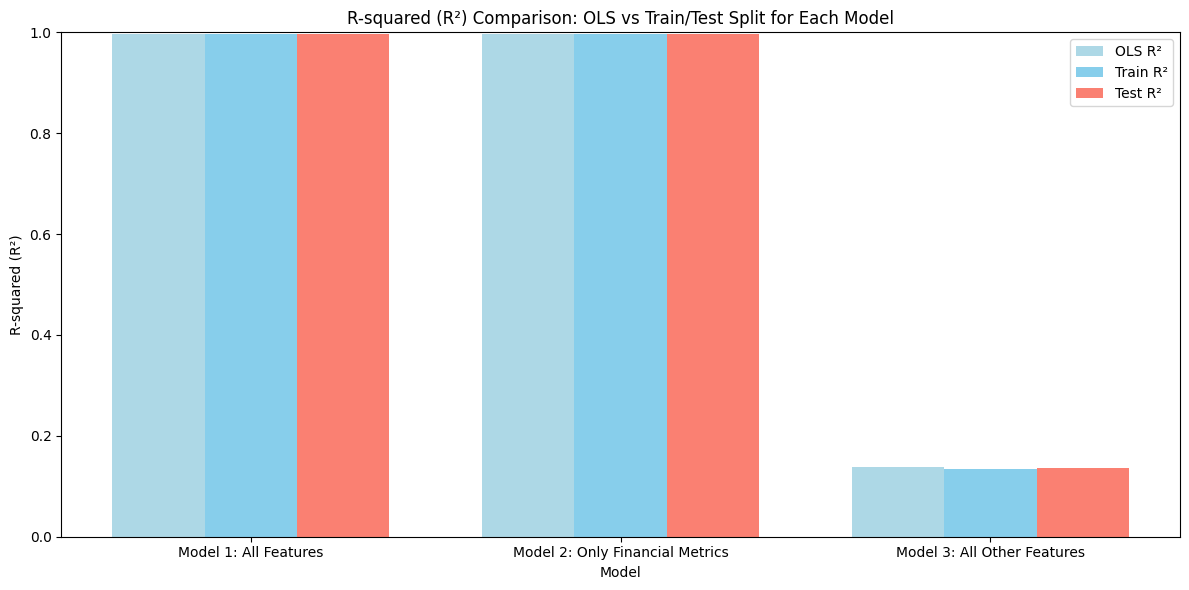

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example R-squared (R²) values for OLS and train/test split performance
# Replace these with actual values obtained from the evaluation
r2_values_ols = {
    "Model 1: All Features": 0.997,
    "Model 2: Only Financial Metrics": 0.997,
    "Model 3: All Other Features":  0.139
}

r2_values_train_test = {
    "Model 1: All Features": {"Train R²": 0.9972, "Test R²": 0.9971},
    "Model 2: Only Financial Metrics": {"Train R²": 0.9970, "Test R²": 0.9969},
    "Model 3: All Other Features": {"Train R²": 0.1344, "Test R²": 0.1362}
}

# Prepare data for plotting
models = list(r2_values_ols.keys())
ols_r2 = [r2_values_ols[model] for model in models]
train_r2 = [r2_values_train_test[model]["Train R²"] for model in models]
test_r2 = [r2_values_train_test[model]["Test R²"] for model in models]

# Set up bar width and positions
bar_width = 0.25
index = np.arange(len(models))

# Plot R-squared values for OLS, Training, and Testing sets
plt.figure(figsize=(12, 6))
plt.bar(index, ols_r2, bar_width, label="OLS R²", color="lightblue")
plt.bar(index + bar_width, train_r2, bar_width, label="Train R²", color="skyblue")
plt.bar(index + 2 * bar_width, test_r2, bar_width, label="Test R²", color="salmon")
plt.xlabel("Model")
plt.ylabel("R-squared (R²)")
plt.title("R-squared (R²) Comparison: OLS vs Train/Test Split for Each Model")
plt.xticks(index + bar_width, models)
plt.ylim(0, 1)  # Set y-axis limit to 1 for better comparison
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

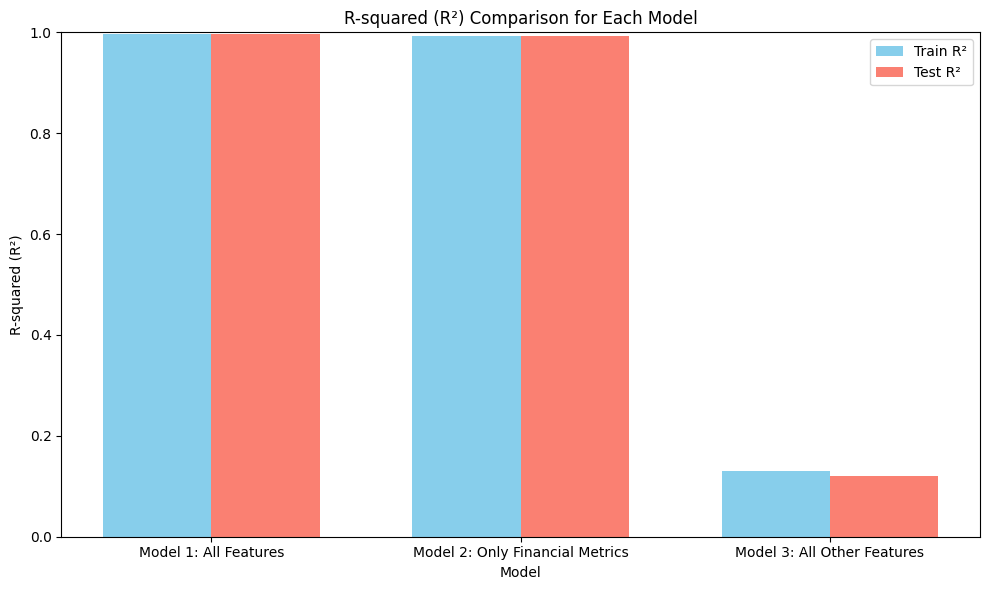

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example R-squared (R²) values for each model's training and testing performance
# Replace these with actual values obtained from the evaluation
r2_values = {
    "Model 1: All Features": {"Train R²": 0.997, "Test R²": 0.996},
    "Model 2: Only Financial Metrics": {"Train R²": 0.993, "Test R²": 0.992},
    "Model 3: All Other Features": {"Train R²": 0.13, "Test R²": 0.12}
}

# Prepare data for plotting
models = list(r2_values.keys())
train_r2 = [r2_values[model]["Train R²"] for model in models]
test_r2 = [r2_values[model]["Test R²"] for model in models]

# Set up bar width and positions
bar_width = 0.35
index = np.arange(len(models))

# Plot R-squared values for training and testing sets
plt.figure(figsize=(10, 6))
plt.bar(index, train_r2, bar_width, label="Train R²", color="skyblue")
plt.bar(index + bar_width, test_r2, bar_width, label="Test R²", color="salmon")
plt.xlabel("Model")
plt.ylabel("R-squared (R²)")
plt.title("R-squared (R²) Comparison for Each Model")
plt.xticks(index + bar_width / 2, models)
plt.ylim(0, 1)  # Setting y-axis to 1 for better comparison
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load a sample of the data to manage memory usage
df
df = pd.read_csv(file_path, low_memory=False, on_bad_lines='skip', nrows=5000)

# Select relevant columns for analysis
columns = [
   'warehouse_code', 'customer_district_code',
   'salesperson_code', 'commission_group_code', 'bonus_group_code',
   'item_type', 'light_source', 'abc_class_code', 'value_sales_aud'
]
df = df[columns]

missing_columns = [col for col in columns if col not in df.columns]
if missing_columns:
    print(f"Warning: Missing columns - {missing_columns}")
else:
    # Filter to only the relevant columns and drop missing values
    df = df[columns].dropna()

    #THE WAREHOUSE_CODES ARE GROUPED BY THEIR STATES.
    warehousecode_to_state = {
    '1N0': 'Factory', '1N1': 'NSW', 'KN0': 'NSW', '1Q0': 'QLD', '1Q1': 'QLD',
    '1S0': 'Regional Area', '1S1': 'Regional Area', '1T0': 'TAS', '1V0': 'VIC', '1W0': 'WA',
    '5N1': 'NSW', '5N2': 'NSW', '5Q0': 'QLD', '5Q1': 'QLD', '5S0': 'Regional Area',
    '5S1': 'Regional Area', '5T0': 'TAS', '5V0': 'VIC', '5W0': 'WA', 'AS0': 'Regional Area',
    'CN0': 'NSW', 'CN1': 'NSW', 'CQ0': 'QLD', 'CS0': 'Regional Area', 'CS1': 'Regional Area',
    'CT0': 'TAS', 'CV0': 'VIC', 'CW0': 'WA', 'EN0': 'NSW', 'FA1': 'NZ', 'FA2': 'NZ',
    'FW2': 'NZ', 'FWA': 'NZ', 'FWE': 'NZ', 'GN0': 'NSW', 'GQ0': 'QLD',
    'GS0': 'Regional Area', 'GW0': 'WA', 'JT0': 'TAS', 'LN9': 'NSW', 'LQ0': 'QLD',
    'LS0': 'Regional Area', 'LS1': 'Regional Area', 'LV0': 'VIC', 'LW0': 'WA', 'N0': 'NSW',
    'Q0': 'QLD', 'Q1': 'QLD', 'S0': 'Regional Area', 'S1': 'Regional Area', 'T0': 'TAS',
    'V0': 'VIC', 'W0': 'WA', 'Unk': 'Unknown'}

    df['warehouse_code'] = df.warehouse_code.replace(warehousecode_to_state)


    #GROUPED BY STATE. USE ONE-HOT-ENCODING
    customer_district_mapping = {
    410: 'QLD', 300: 'VIC', 500: 'Regional Area', 310: 'TAS', 400: 'QLD',
    200: 'NSW', 210: 'ACT', 720: 'Intercompany', 710: 'Head Office',
    600: 'WA', 510: 'Regional Area', 530: 'NZ', 535: 'NZ', 540: 'NZ',
    520: 'NZ', 545: 'NZ'}

    df['customer_district_code'] = df.customer_district_code.replace(customer_district_mapping)

    #USE ORDINAL ENCODING BASED ON SUBJECTIVE RANKING. HIGHER NUMBER MEANS BETTER
    abc_code_encoder = {'A':10, 'F':9, 'B':8, 'J':7, 'I':6, 'C':5, 'E':4, 'D':3, 'G':2, 'U':1}

    df['abc_class_code'] = df['abc_class_code'].replace(abc_code_encoder).infer_objects(copy=False)

    # Frequency encoding for salesperson_code
    salesperson_freq = df['salesperson_code'].value_counts()
    df['salesperson_code_freq'] = df['salesperson_code'].map(salesperson_freq)

    # Setting up for regression model
    X = df[['warehouse_code', 'customer_district_code', 'commission_group_code', 'salesperson_code_freq', 'bonus_group_code', 'item_type', 'light_source', 'abc_class_code']]
    X = pd.get_dummies(X, columns=['warehouse_code', 'customer_district_code', 'commission_group_code', 'bonus_group_code', 'item_type', 'light_source', 'abc_class_code'], drop_first=True)
    X = X.astype(float)

    # Define dependent variable
    y = df['value_sales_aud'].astype(float)

    # Adding constant to include intercept
    X = sm.add_constant(X)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Display the regression summary
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        value_sales_aud   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     47.18
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          7.53e-163
Time:                        15:05:43   Log-Likelihood:                 5381.6
No. Observations:                5000   AIC:                        -1.072e+04
Df Residuals:                    4980   BIC:                        -1.059e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


<ipython-input-9-aaa803f36f8f>:53: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['abc_class_code'] = df['abc_class_code'].replace(abc_code_encoder).infer_objects(copy=False)


In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load a sample of the data
df = pd.read_csv(file_path, low_memory=False, on_bad_lines='skip', nrows=5000)

# Filter the data to only include records for customer 525200100
customer_id = 525200100
df = df[df['customer_code'] == customer_id]

# Select relevant columns for analysis
columns = [
   'warehouse_code', 'customer_district_code', 'salesperson_code',
   'commission_group_code', 'bonus_group_code', 'item_type', 'light_source',
   'abc_class_code', 'value_sales_aud'
]
df = df[columns]

# Check if required columns are available and drop missing values
df = df.dropna()

# Map warehouse codes to states
warehousecode_to_state = {
    '1N0': 'Factory', '1N1': 'NSW', 'KN0': 'NSW', '1Q0': 'QLD', '1Q1': 'QLD',
    '1S0': 'Regional Area', '1S1': 'Regional Area', '1T0': 'TAS', '1V0': 'VIC', '1W0': 'WA',
    '5N1': 'NSW', '5N2': 'NSW', '5Q0': 'QLD', '5Q1': 'QLD', '5S0': 'Regional Area',
    '5S1': 'Regional Area', '5T0': 'TAS', '5V0': 'VIC', '5W0': 'WA', 'AS0': 'Regional Area',
    'CN0': 'NSW', 'CN1': 'NSW', 'CQ0': 'QLD', 'CS0': 'Regional Area', 'CS1': 'Regional Area',
    'CT0': 'TAS', 'CV0': 'VIC', 'CW0': 'WA', 'EN0': 'NSW', 'FA1': 'NZ', 'FA2': 'NZ',
    'FW2': 'NZ', 'FWA': 'NZ', 'FWE': 'NZ', 'GN0': 'NSW', 'GQ0': 'QLD',
    'GS0': 'Regional Area', 'GW0': 'WA', 'JT0': 'TAS', 'LN9': 'NSW', 'LQ0': 'QLD',
    'LS0': 'Regional Area', 'LS1': 'Regional Area', 'LV0': 'VIC', 'LW0': 'WA', 'N0': 'NSW',
    'Q0': 'QLD', 'Q1': 'QLD', 'S0': 'Regional Area', 'S1': 'Regional Area', 'T0': 'TAS',
    'V0': 'VIC', 'W0': 'WA', 'Unk': 'Unknown'
}
df['warehouse_code'] = df['warehouse_code'].replace(warehousecode_to_state)

# Map customer district codes to states
customer_district_mapping = {
    410: 'QLD', 300: 'VIC', 500: 'Regional Area', 310: 'TAS', 400: 'QLD',
    200: 'NSW', 210: 'ACT', 720: 'Intercompany', 710: 'Head Office',
    600: 'WA', 510: 'Regional Area', 530: 'NZ', 535: 'NZ', 540: 'NZ',
    520: 'NZ', 545: 'NZ'
}
df['customer_district_code'] = df['customer_district_code'].replace(customer_district_mapping)

# Apply ordinal encoding for abc_class_code
abc_code_encoder = {'A':10, 'F':9, 'B':8, 'J':7, 'I':6, 'C':5, 'E':4, 'D':3, 'G':2, 'U':1}
df['abc_class_code'] = df['abc_class_code'].replace(abc_code_encoder).infer_objects(copy=False)

# Frequency encoding for salesperson_code
salesperson_freq = df['salesperson_code'].value_counts()
df['salesperson_code_freq'] = df['salesperson_code'].map(salesperson_freq)

# Set up independent variables, replacing salesperson_code with salesperson_code_freq
X = df[['warehouse_code', 'customer_district_code', 'salesperson_code_freq',
        'commission_group_code', 'bonus_group_code', 'item_type', 'light_source', 'abc_class_code']]

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=['warehouse_code', 'customer_district_code',
                               'commission_group_code', 'bonus_group_code', 'item_type', 'light_source'], drop_first=True)

# Convert all columns to float type
X = X.astype(float)

# Define dependent variable as value_sales_aud for the specific customer
y = df['value_sales_aud'].astype(float)

# Adding constant to include intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        value_sales_aud   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     6.003
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           0.000747
Time:                        15:10:07   Log-Likelihood:                 304.98
No. Observations:                 128   AIC:                            -602.0
Df Residuals:                     124   BIC:                            -590.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
salesperson_code

<ipython-input-6-8ca214823dff>:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['abc_class_code'] = df['abc_class_code'].replace(abc_code_encoder).infer_objects(copy=False)


In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load a sample of the data
df = pd.read_csv(file_path, low_memory=False, on_bad_lines='skip', nrows=5000)

# Filter data to include only records for customer 525200100
customer_id = 525200100
df = df[df['customer_code'] == customer_id]

# Select relevant columns for analysis
columns = [
    'warehouse_code', 'customer_district_code',
    'salesperson_code', 'commission_group_code', 'bonus_group_code',
    'item_type', 'light_source', 'abc_class_code', 'value_sales_aud'
]
df = df[columns]

# Check for missing columns
missing_columns = [col for col in columns if col not in df.columns]
if missing_columns:
    print(f"Warning: Missing columns - {missing_columns}")
else:
    # Drop missing values
    df = df.dropna()

    # Replace warehouse codes with states
    warehousecode_to_state = {
        '1N0': 'Factory', '1N1': 'NSW', 'KN0': 'NSW', '1Q0': 'QLD', '1Q1': 'QLD',
        '1S0': 'Regional Area', '1S1': 'Regional Area', '1T0': 'TAS', '1V0': 'VIC', '1W0': 'WA',
        '5N1': 'NSW', '5N2': 'NSW', '5Q0': 'QLD', '5Q1': 'QLD', '5S0': 'Regional Area',
        '5S1': 'Regional Area', '5T0': 'TAS', '5V0': 'VIC', '5W0': 'WA', 'AS0': 'Regional Area',
        'CN0': 'NSW', 'CN1': 'NSW', 'CQ0': 'QLD', 'CS0': 'Regional Area', 'CS1': 'Regional Area',
        'CT0': 'TAS', 'CV0': 'VIC', 'CW0': 'WA', 'EN0': 'NSW', 'FA1': 'NZ', 'FA2': 'NZ',
        'FW2': 'NZ', 'FWA': 'NZ', 'FWE': 'NZ', 'GN0': 'NSW', 'GQ0': 'QLD',
        'GS0': 'Regional Area', 'GW0': 'WA', 'JT0': 'TAS', 'LN9': 'NSW', 'LQ0': 'QLD',
        'LS0': 'Regional Area', 'LS1': 'Regional Area', 'LV0': 'VIC', 'LW0': 'WA', 'N0': 'NSW',
        'Q0': 'QLD', 'Q1': 'QLD', 'S0': 'Regional Area', 'S1': 'Regional Area', 'T0': 'TAS',
        'V0': 'VIC', 'W0': 'WA', 'Unk': 'Unknown'
    }
    df['warehouse_code'] = df['warehouse_code'].replace(warehousecode_to_state)

    # Map customer district codes to broader regions
    customer_district_mapping = {
        410: 'QLD', 300: 'VIC', 500: 'Regional Area', 310: 'TAS', 400: 'QLD',
        200: 'NSW', 210: 'ACT', 720: 'Intercompany', 710: 'Head Office',
        600: 'WA', 510: 'Regional Area', 530: 'NZ', 535: 'NZ', 540: 'NZ',
        520: 'NZ', 545: 'NZ'
    }
    df['customer_district_code'] = df['customer_district_code'].replace(customer_district_mapping)

    # Ordinal encoding for abc_class_code based on ranking
    abc_code_encoder = {'A': 10, 'F': 9, 'B': 8, 'J': 7, 'I': 6, 'C': 5, 'E': 4, 'D': 3, 'G': 2, 'U': 1}
    df['abc_class_code'] = df['abc_class_code'].replace(abc_code_encoder).infer_objects(copy=False)

    # Frequency encoding for salesperson_code within the specific customer data
    salesperson_freq = df['salesperson_code'].value_counts()
    df['salesperson_code_freq'] = df['salesperson_code'].map(salesperson_freq)

    # Set up independent variables (X), replacing salesperson_code with salesperson_code_freq
    X = df[['warehouse_code', 'customer_district_code', 'salesperson_code_freq',
            'commission_group_code', 'bonus_group_code', 'item_type', 'light_source', 'abc_class_code']]

    # One-hot encode remaining categorical columns except salesperson_code_freq
    X = pd.get_dummies(X, columns=['warehouse_code', 'customer_district_code',
                                   'commission_group_code', 'bonus_group_code',
                                   'item_type', 'light_source'], drop_first=True)
    X = X.astype(float)

    # Define dependent variable
    y = df['value_sales_aud'].astype(float)

    # Add a constant to the model (for the intercept)
    X = sm.add_constant(X)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Display the regression summary
    print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        value_sales_aud   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     6.003
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           0.000747
Time:                        15:14:14   Log-Likelihood:                 304.98
No. Observations:                 128   AIC:                            -602.0
Df Residuals:                     124   BIC:                            -590.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
salesperson_code

<ipython-input-4-20caf64fb8e4>:55: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['abc_class_code'] = df['abc_class_code'].replace(abc_code_encoder).infer_objects(copy=False)


In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Assume df_sampled is already loaded and selected with relevant columns

# Replace warehouse codes with state names
warehousecode_to_state = {
    '1N0': 'Factory', '1N1': 'NSW', 'KN0': 'NSW', '1Q0': 'QLD', '1Q1': 'QLD',
    '1S0': 'Regional Area', '1S1': 'Regional Area', '1T0': 'TAS', '1V0': 'VIC', '1W0': 'WA',
    '5N1': 'NSW', '5N2': 'NSW', '5Q0': 'QLD', '5Q1': 'QLD', '5S0': 'Regional Area',
    '5S1': 'Regional Area', '5T0': 'TAS', '5V0': 'VIC', '5W0': 'WA', 'AS0': 'Regional Area',
    'CN0': 'NSW', 'CN1': 'NSW', 'CQ0': 'QLD', 'CS0': 'Regional Area', 'CS1': 'Regional Area',
    'CT0': 'TAS', 'CV0': 'VIC', 'CW0': 'WA', 'EN0': 'NSW', 'FA1': 'NZ', 'FA2': 'NZ',
    'FW2': 'NZ', 'FWA': 'NZ', 'FWE': 'NZ', 'GN0': 'NSW', 'GQ0': 'QLD',
    'GS0': 'Regional Area', 'GW0': 'WA', 'JT0': 'TAS', 'LN9': 'NSW', 'LQ0': 'QLD',
    'LS0': 'Regional Area', 'LS1': 'Regional Area', 'LV0': 'VIC', 'LW0': 'WA', 'N0': 'NSW',
    'Q0': 'QLD', 'Q1': 'QLD', 'S0': 'Regional Area', 'S1': 'Regional Area', 'T0': 'TAS',
    'V0': 'VIC', 'W0': 'WA', 'Unk': 'Unknown'}

df_sampled['warehouse_code'] = df_sampled['warehouse_code'].replace(warehousecode_to_state)

# One-hot encode warehouse_code and other categorical variables
df_encoded = pd.get_dummies(df_sampled, columns=['warehouse_code'], drop_first=True)

# Convert all categorical columns to numeric codes
categorical_cols = ['customer_district_code', 'salesperson_code', 'commission_group_code',
                    'bonus_group_code', 'item_type', 'light_source',
                    'abc_class_code', 'abc_class_volume']
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# Confirm all columns are numeric
print("Data Types of Each Column in df_encoded:")
print(df_encoded.dtypes)

# Handle any residual NaNs by filling with zero
df_encoded = df_encoded.fillna(0)

# Define dependent and independent variables
y = df_encoded['value_sales_aud']
X = df_encoded.drop(['value_sales_aud'], axis=1)

# Convert X and y to numpy arrays to prevent dtype issues
y = np.asarray(y, dtype=np.float64)
X = np.asarray(X, dtype=np.float64)

# Add a constant to X for the intercept
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Display the summary
print(model.summary())


Data Types of Each Column in df_encoded:
value_sales_aud                 float64
customer_district_code             int8
salesperson_code                   int8
commission_group_code              int8
bonus_group_code                   int8
item_type                          int8
light_source                       int8
abc_class_code                     int8
abc_class_volume                   int8
warehouse_code_QLD                 bool
warehouse_code_Regional Area       bool
warehouse_code_VIC                 bool
warehouse_code_WA                  bool
dtype: object
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     35.01
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           1.56e-60
Time:                        1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       13 non-null     object
dtypes: object(1)
memory usage: 232.0+ bytes


In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load a sample of the data to manage memory usage
df = pd.read_csv('/content/drive/MyDrive/79/Latest_Cleaned_Dataset.csv', low_memory=False, on_bad_lines='skip')

# Calculate revenue as the dependent variable
df['revenue'] = df['value_sales_aud'] - df['value_cost_aud']

# Select relevant columns for analysis
columns = [
    'calendar_month', 'customer_district_code', 'business_area_code', 'item_type',
    'warehouse_code', 'abc_class_code', 'salesperson_code', 'value_quantity',
    'value_price_adjustment', 'process_time', 'value_sales_aud'
]
df = df[columns]

missing_columns = [col for col in columns if col not in df.columns]
if missing_columns:
    print(f"Warning: Missing columns - {missing_columns}")
else:
    # Filter to only the relevant columns and drop missing values
    df = df[columns].dropna()


    #GROUPED BY STATE. USE ONE-HOT-ENCODING
    customer_district_mapping = {
    410: 'QLD', 300: 'VIC', 500: 'Regional Area', 310: 'TAS', 400: 'QLD',
    200: 'NSW', 210: 'ACT', 720: 'Intercompany', 710: 'Head Office',
    600: 'WA', 510: 'Regional Area', 530: 'NZ', 535: 'NZ', 540: 'NZ',
    520: 'NZ', 545: 'NZ'}

    df['customer_district_code'] = df.customer_district_code.replace(customer_district_mapping)

    #USE ORDINAL ENCODING BASED ON SUBJECTIVE RANKING. HIGHER NUMBER MEANS BETTER
    abc_code_encoder = {'A':10, 'F':9, 'B':8, 'J':7, 'I':6, 'C':5, 'E':4, 'D':3, 'G':2, 'U':1}

    df['abc_class_code'] = df['abc_class_code'].replace(abc_code_encoder).infer_objects(copy=False)

    #THE WAREHOUSE_CODES ARE GROUPED BY THEIR STATES.
    warehousecode_to_state = {
    '1N0': 'Factory', '1N1': 'NSW', 'KN0': 'NSW', '1Q0': 'QLD', '1Q1': 'QLD',
    '1S0': 'Regional Area', '1S1': 'Regional Area', '1T0': 'TAS', '1V0': 'VIC', '1W0': 'WA',
    '5N1': 'NSW', '5N2': 'NSW', '5Q0': 'QLD', '5Q1': 'QLD', '5S0': 'Regional Area',
    '5S1': 'Regional Area', '5T0': 'TAS', '5V0': 'VIC', '5W0': 'WA', 'AS0': 'Regional Area',
    'CN0': 'NSW', 'CN1': 'NSW', 'CQ0': 'QLD', 'CS0': 'Regional Area', 'CS1': 'Regional Area',
    'CT0': 'TAS', 'CV0': 'VIC', 'CW0': 'WA', 'EN0': 'NSW', 'FA1': 'NZ', 'FA2': 'NZ',
    'FW2': 'NZ', 'FWA': 'NZ', 'FWE': 'NZ', 'GN0': 'NSW', 'GQ0': 'QLD',
    'GS0': 'Regional Area', 'GW0': 'WA', 'JT0': 'TAS', 'LN9': 'NSW', 'LQ0': 'QLD',
    'LS0': 'Regional Area', 'LS1': 'Regional Area', 'LV0': 'VIC', 'LW0': 'WA', 'N0': 'NSW',
    'Q0': 'QLD', 'Q1': 'QLD', 'S0': 'Regional Area', 'S1': 'Regional Area', 'T0': 'TAS',
    'V0': 'VIC', 'W0': 'WA', 'Unk': 'Unknown'}

    df['warehouse_code'] = df.warehouse_code.replace(warehousecode_to_state)



    # Treat `warehouse_code` as a categorical variable directly
    # No need to convert to int; we'll one-hot encode it
    X = df[['customer_district_code', 'abc_class_code', 'warehouse_code',
        'value_quantity', 'value_price_adjustment']]
    X = pd.get_dummies(X, columns=['customer_district_code', 'abc_class_code', 'warehouse_code'], drop_first=True)
    X = X.astype(float)

    # Define the dependent variable
    y = df['value_sales_aud'].astype(float)


    # Add a constant to include an intercept in the regression model
    X = sm.add_constant(X)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Display the regression summary
    print(model.summary())

<ipython-input-6-973043de7a44>:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['abc_class_code'] = df['abc_class_code'].replace(abc_code_encoder).infer_objects(copy=False)


                            OLS Regression Results                            
Dep. Variable:        value_sales_aud   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     9629.
Date:                Tue, 05 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:57:03   Log-Likelihood:             2.1901e+05
No. Observations:              538574   AIC:                        -4.380e+05
Df Residuals:                  538550   BIC:                        -4.377e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [ ]:
# Select relevant columns
columns = [
    'revenue',                    # Dependent variable (Order Processing Time)
    'customer_district_code',     # Month of the year
    'abc_class_code',             # Customer location
    'warehouse_code',             # Warehouse handling the order (now treated as categorical)
    'value_quantity',             # Product classification
    'value_price_adjustment',     # Type of order
]

The file is imported through Google Drive. If you cannot import through this way, feel free to delete it and import the file normally, like you've always done it.

# **A. DATA EXPLORERATION AND CLEANING**

## **1. Exploring and Soft Cleaning**

###Exploration

In [11]:
#Check unique values of each column
for col in year2012.columns:
    print(f"Column: {col}")
    print(year2012[col].unique())
    print("-" * 40)  #Separator for better readability

NameError: name 'year2012' is not defined

item_group_code, item_class_code, bonus_group_code, environment_group_code, technology_group_code, commission_group_code, business_chain_l1_code, contact_method_code, business_area_code, item_code

In [ ]:
columns_to_process = [
    'item_group_code', 'item_class_code', 'bonus_group_code', 'environment_group_code',
    'technology_group_code', 'commission_group_code', 'business_chain_l1_code',
    'contact_method_code', 'business_area_code', 'item_code'
]

# Apply the operations to the specific columns only
for column in columns_to_process:
    # Convert values to string, strip trailing spaces, and get unique values
    year2012[column] = year2012[column].astype(str).str.strip()

In [ ]:
#Check unique values of each column
for col in year2013.columns:
    print(f"Column: {col}")
    print(year2013[col].unique())
    print("-" * 40)  #Separator for better readability

Column: accounting_date
[20130125 20130513 20130611 20130111 20130321 20130328 20130306 20130607
 20130410 20130326 20130308 20130315 20130107 20130520 20130502 20130521
 20130523 20130424 20130212 20130411 20130228 20130626 20130509 20130208
 20130422 20130612 20130527 20130506 20130617 20130613 20130117 20130419
 20130110 20130515 20130507 20130116 20130124 20130528 20130122 20130404
 20130530 20130516 20130426 20130220 20130423 20130603 20130624 20130319
 20130430 20130312 20130618 20130314 20130108 20130514 20130201 20130403
 20130517 20130628 20130226 20130222 20130221 20130327 20130621 20130225
 20130118 20130307 20130429 20130115 20130311 20130129 20130503 20130522
 20130525 20130501 20130211 20130227 20130604 20130130 20130510 20130109
 20130409 20130619 20130415 20130218 20130620 20130214 20130605 20130614
 20130402 20130207 20130405 20130627 20130304 20130524 20130325 20130625
 20130206 20130305 20130416 20130131 20130531 20130606 20130121 20130408
 20130103 20130417 20130213

In [ ]:
columns_to_process = [
    'item_group_code', 'item_class_code', 'bonus_group_code', 'environment_group_code',
    'technology_group_code', 'commission_group_code', 'business_chain_l1_code',
    'contact_method_code', 'business_area_code', 'item_code'
]

# Apply the operations to the specific columns only
for column in columns_to_process:
    # Convert values to string, strip trailing spaces, and get unique values
    year2013[column] = year2013[column].astype(str).str.strip()

In [ ]:
print(year2012.info(), '\n')
print(year2013.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037205 entries, 0 to 1037204
Data columns (total 41 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   accounting_date           1037205 non-null  int64  
 1   fiscal_year               1037205 non-null  int64  
 2   fiscal_month              1037205 non-null  int64  
 3   calendar_year             1037205 non-null  int64  
 4   calendar_month            1037205 non-null  int64  
 5   calendar_day              1037205 non-null  int64  
 6   company_code              1037205 non-null  int64  
 7   customer_code             1037205 non-null  object 
 8   customer_district_code    1037205 non-null  int64  
 9   item_code                 1037205 non-null  object 
 10  business_area_code        1037205 non-null  object 
 11  item_group_code           1037205 non-null  object 
 12  item_class_code           1037205 non-null  object 
 13  item_type                 1

In [ ]:
#Compare accounting_date and invoice_date and convert to int
date_match_2012 = (year2012['accounting_date'] == year2012['invoice_date']).astype(int).sum()
date_match_2013 = (year2013['accounting_date'] == year2013['invoice_date']).astype(int).sum()

print(f"Total matching accounting_date and invoice_date 2012: {date_match_2012}")
print(f"Total matching accounting_date and invoice_date 2013: {date_match_2013}")

Total matching accounting_date and invoice_date 2012: 1037205
Total matching accounting_date and invoice_date 2013: 951177


In [ ]:
#Datetime format conversion
column_for_convert = ['accounting_date', 'order_date', 'invoice_date']

for col in column_for_convert:
    year2012[col] = pd.to_datetime(year2012[col], format='%Y%m%d')
    year2013[col] = pd.to_datetime(year2013[col], format='%Y%m%d')

### Soft Cleaning

In [ ]:
#Check if conversion success
check_column = ['accounting_date', 'order_date', 'invoice_date']
print(year2012[check_column].head())
print(year2013[check_column].head())

  accounting_date order_date invoice_date
0      2012-05-09 2012-05-09   2012-05-09
1      2012-02-16 2012-02-16   2012-02-16
2      2012-05-09 2012-05-08   2012-05-09
3      2012-05-18 2012-05-18   2012-05-18
4      2012-01-09 2012-01-09   2012-01-09
  accounting_date order_date invoice_date
0      2013-01-25 2013-01-25   2013-01-25
1      2013-05-13 2013-05-10   2013-05-13
2      2013-06-11 2013-06-11   2013-06-11
3      2013-01-11 2013-01-11   2013-01-11
4      2013-03-21 2013-03-20   2013-03-21


**invoice_date**

Assessing both the 2012 and 2013 dataset, the accounting_date and invoice_date are exactly the same, so we may consider dropping the invoice_date for data concision.

**order_date**

Some observations shows different between order_date and accounting_date, indicating there are differences between the order placement date and the time it was recorded. Therefore, we keep both columns for further analysis

**other considerations**

Across the dataset, there are also irrelevant or useless features, which will be dropped as well, including the followings:
*   market_segment: only have 1 unique value
*   item_source_class: is empty
*   dss_update_time: irrelevant to the research





In [ ]:
# Dropping usable columns
unusable_column = ['invoice_date', 'market_segment', 'item_source_class', 'dss_update_time']

year2012 = year2012.drop(unusable_column, axis = 1)
year2013 = year2013.drop(unusable_column, axis = 1)

In [ ]:
print(f'2012 Data Size: {year2012.shape}')
print(f'2013 Data Size: {year2013.shape}')

2012 Data Size: (1037205, 37)
2013 Data Size: (951177, 37)


## **2. Hard Cleaning**

### Null values

In [ ]:
# Check null values
print('YEAR 2012:')
print(year2012.isnull().sum(), '\n')
print('YEAR 2013:')
print(year2013.isnull().sum())

YEAR 2012:
accounting_date             0
fiscal_year                 0
fiscal_month                0
calendar_year               0
calendar_month              0
calendar_day                0
company_code                0
customer_code               0
customer_district_code      0
item_code                   0
business_area_code          0
item_group_code             0
item_class_code             0
item_type                   0
bonus_group_code            0
environment_group_code      0
technology_group_code       0
commission_group_code       0
reporting_classification    0
light_source                0
warehouse_code              0
abc_class_code              0
abc_class_volume            0
business_chain_l1_code      0
business_chain_l1_name      0
contact_method_code         0
salesperson_code            0
order_type_code             0
value_sales                 0
value_cost                  0
value_quantity              0
value_price_adjustment      0
currency                    0

### Value Consistency

#### Check unique value

In [ ]:
#Check unique values of each column
print('YEAR 2012:')
for col in year2012.columns:
    print(f"Column: {col}")
    print(year2012[col].unique())
    print("-" * 40)  #Separator for better readability

print()

print('YEAR 2013:')
for col in year2013.columns:
    print(f"Column: {col}")
    print(year2013[col].unique())
    print("-" * 40)  #Separator for better readability

YEAR 2012:
Column: accounting_date
<DatetimeArray>
['2012-05-09 00:00:00', '2012-02-16 00:00:00', '2012-05-18 00:00:00',
 '2012-01-09 00:00:00', '2012-05-04 00:00:00', '2012-06-26 00:00:00',
 '2012-06-05 00:00:00', '2012-06-22 00:00:00', '2012-04-03 00:00:00',
 '2012-04-18 00:00:00',
 ...
 '2012-11-18 00:00:00', '2012-10-01 00:00:00', '2012-08-18 00:00:00',
 '2012-12-31 00:00:00', '2012-12-28 00:00:00', '2012-07-07 00:00:00',
 '2012-12-24 00:00:00', '2012-09-08 00:00:00', '2012-12-02 00:00:00',
 '2012-07-28 00:00:00']
Length: 274, dtype: datetime64[ns]
----------------------------------------
Column: fiscal_year
[2012 2013]
----------------------------------------
Column: fiscal_month
[11  8  7 12 10  9  3  5  6  1  2  4]
----------------------------------------
Column: calendar_year
[2012]
----------------------------------------
Column: calendar_month
[ 5  2  1  6  4  3  9 11 12  7  8 10]
----------------------------------------
Column: calendar_day
[ 9 16 18  4 26  5 22  3 17 20 23 

#### Currency

In [ ]:
# Replace AUS with AUD
year2012['currency'] = year2012['currency'].replace('AUS', 'AUD')
year2013['currency'] = year2013['currency'].replace('AUS', 'AUD')

# Drop the only empty value
year2012['currency'] = year2012['currency'].str.strip() # Remove leading/trailing spaces
year2012 = year2012[year2012['currency'] != ''] # Filter out rows where 'currency' is blank after stripping spaces

year2013['currency'] = year2013['currency'].str.strip() # Remove leading/trailing spaces
year2013 = year2013[year2013['currency'] != ''] # Filter out rows where 'currency' is blank after stripping spaces

In [ ]:
year2012.currency.value_counts()

,count
currency,
AUD,985748
NZD,50651
EUR,503
USD,302


In [ ]:
year2013.currency.value_counts()

,count
currency,
AUD,884821
NZD,65982
USD,373


Exchange Rate are procure here: https://www.kaggle.com/datasets/thebasss/currency-exchange-rates?resource=download

In [ ]:
'''

# Create exchange rate dataframe
currency_data = pd.read_csv('currency_exchange_rate.csv')

# Convert 'Date' to datetime format
currency_data['Date'] = pd.to_datetime(currency_data['Date'], errors='coerce')

# Filter data between 2011 and 2014
filtered_date = currency_data[
    (currency_data['Date'].dt.year >= 2011) & (currency_data['Date'].dt.year <= 2014)
]

# Keep only the relevant columns (AUD, USD, NZD, EUR, and Date)
filtered_currency = filtered_date[['Date', 'Australian Dollar', 'U.S. Dollar',
                               'New Zealand Dollar', 'Euro']]

# Forward fill (propagate the last valid value forward)
filtered_currency = filtered_currency.fillna(method='ffill')

# Backward fill (propagate the next valid value backward)
filtered_currency = filtered_currency.fillna(method='bfill')

# Export the filtered data to a CSV file
filtered_currency.to_csv('currency_exchange_rate.csv', index=False)

# Download the file to your local machine
from google.colab import files
files.download('currency_exchange_rate.csv')

# Generate a complete date range between the min and max dates in exchange rates
all_dates = pd.date_range(start=exchange_rates['Date'].min(), end=exchange_rates['Date'].max())

# Reindex the exchange rates to ensure all dates are included, and fill missing rates using forward fill
exchange_rates_filled = exchange_rates.set_index('Date').reindex(all_dates).ffill().reset_index()
exchange_rates_filled.rename(columns={'index': 'Date'}, inplace=True)

# Export the filtered data to a CSV file
exchange_rates_filled.to_csv('currency_exchange_rate.csv', index=False)

# Download the file to your local machine
from google.colab import files
files.download('currency_exchange_rate.csv')
'''

"\n\n# Create exchange rate dataframe\ncurrency_data = pd.read_csv('currency_exchange_rate.csv')\n\n# Convert 'Date' to datetime format\ncurrency_data['Date'] = pd.to_datetime(currency_data['Date'], errors='coerce')\n\n# Filter data between 2011 and 2014\nfiltered_date = currency_data[\n    (currency_data['Date'].dt.year >= 2011) & (currency_data['Date'].dt.year <= 2014)\n]\n\n# Keep only the relevant columns (AUD, USD, NZD, EUR, and Date)\nfiltered_currency = filtered_date[['Date', 'Australian Dollar', 'U.S. Dollar',\n                               'New Zealand Dollar', 'Euro']]\n\n# Forward fill (propagate the last valid value forward)\nfiltered_currency = filtered_currency.fillna(method='ffill')\n\n# Backward fill (propagate the next valid value backward)\nfiltered_currency = filtered_currency.fillna(method='bfill')\n\n# Export the filtered data to a CSV file\nfiltered_currency.to_csv('currency_exchange_rate.csv', index=False)\n\n# Download the file to your local machine\nfrom googl

To sum up, after retrieving the currency exchange rate from the provided link, it was trimmed to retrieve only dates from 2011 to 2014. Additionally, for simplicity, only columns that refer to AUD, USD, NZD, and EUR was kept, which is aligned to the existing unique values in the two datasets.

Finally, missing value was fill using ffill and bfill, which, respectively, use the last known or next valid value to fill the missing value.

The dataset is then stored for transforming our target *'currency'* column in our main 2012 and 2013 dataset.

### Duplicates

#### invoice_number

There are many observations with similar invoice_number, distinguished by either differnt line_number, customer_code, business_area_code, and many other features. Therefore, it is recommend to drop only observations with exactly similar values across all columns.

In [ ]:
print('Before drop duplicates:')
print(year2012.shape)
print(year2013.shape)

Before drop duplicates:
(1037204, 37)
(951176, 37)


In [ ]:
year2012 = year2012.drop_duplicates(keep = 'first')
year2013 = year2013.drop_duplicates(keep = 'first')

In [ ]:
print('After drop duplicates:')
print(year2012.shape)
print(year2013.shape)

After drop duplicates:
(1032372, 37)
(947794, 37)


### Data Engineering

#### Currency Conversion

In [ ]:
# Convert to currency AUD
exchange_rates['Date'] = pd.to_datetime(exchange_rates['Date'], format='%Y-%m-%d')

# Merge the dataset with exchange rates based on order date
merged_data = pd.merge(
    year2013,
    exchange_rates,
    left_on='order_date',
    right_on='Date',
    how='left'
)

# Function to convert value_sales to AUD
def convert_to_aud(row, value_column):
    if row[value_column] == 0:
        return 0  # Skip conversion if the value is 0

    if row['currency'] == 'USD':
        return row[value_column] * row['Australian Dollar']
    elif row['currency'] == 'NZD':
        return (row[value_column] / row['New Zealand Dollar']) * row['Australian Dollar']
    elif row['currency'] == 'EUR':
        return (row[value_column] / row['Euro']) * row['Australian Dollar']
    else:  # If currency is AUD or unknown, leave as is
        return row[value_column]

# Apply the conversion for both value_sales and value_cost
year2013['value_sales_aud'] = merged_data.apply(lambda row: convert_to_aud(row, 'value_sales'), axis=1)
year2013['value_cost_aud'] = merged_data.apply(lambda row: convert_to_aud(row, 'value_cost'), axis=1)

NameError: name 'exchange_rates' is not defined

In [ ]:
# Display the first few rows to confirm the conversion
year2013[year2013['currency'] == 'USD'][['currency', 'value_sales', 'value_sales_aud', 'order_date']].head()

In [ ]:
# Merge the dataset with exchange rates based on order date
merged_data = pd.merge(
    year2012,
    exchange_rates,
    left_on='order_date',
    right_on='Date',
    how='left'
)

# Apply the conversion for both value_sales and value_cost
year2012['value_sales_aud'] = merged_data.apply(lambda row: convert_to_aud(row, 'value_sales'), axis=1)
year2012['value_cost_aud'] = merged_data.apply(lambda row: convert_to_aud(row, 'value_cost'), axis=1)


In [ ]:
def fill_aud_value_sales(row):
    if pd.isna(row['value_sales_aud']) and row['currency'] == 'AUD':
        return row['value_sales']  # Use original value_sales if currency is AUD
    return row['value_sales_aud']  # Otherwise, keep the existing value_sales_aud

# Function to fill missing 'value_cost_aud' if currency is already AUD
def fill_aud_value_cost(row):
    if pd.isna(row['value_cost_aud']) and row['currency'] == 'AUD':
        return row['value_cost']  # Use original value_cost if currency is AUD
    return row['value_cost_aud']  # Otherwise, keep the existing value_cost_aud

# Apply the functions to fill NaN values
year2013['value_sales_aud'] = year2013.apply(fill_aud_value_sales, axis=1)
year2013['value_cost_aud'] = year2013.apply(fill_aud_value_cost, axis=1)

year2012['value_sales_aud'] = year2012.apply(fill_aud_value_sales, axis=1)
year2012['value_cost_aud'] = year2012.apply(fill_aud_value_cost, axis=1)

In [ ]:
# Display the first few rows to confirm the conversion
year2012[year2012['currency'] == 'USD'][['currency', 'value_sales', 'value_sales_aud', 'value_cost', 'value_cost_aud', 'order_date']].head()

In [ ]:
# Display the first few rows to confirm the conversion
year2013[year2013['currency'] == 'USD'][['currency', 'value_sales', 'value_sales_aud', 'value_cost', 'value_cost_aud', 'order_date']].head()

#### Cost Margin

Before performing the cost margin by item_code, we will check where value_sales is zero to avoid divide-by-zero errors the code to assign a cost margin of 0 or NaN .

In [12]:
year2012 = pd.read_csv('/content/2012_Data.csv', encoding='ISO-8859-1', low_memory=False)
year2013 = pd.read_csv('/content/2013_Data.csv', encoding='ISO-8859-1', low_memory=False)

In [13]:
# The rows with 'value_sales' equal to or less than zero year 2012

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

zeronegative_sales2012 = year2012[year2012['value_sales'] <= 0]

# Displaying the filtered rows
print(zeronegative_sales2012)

       accounting_date  fiscal_year  fiscal_month  calendar_year  calendar_month  calendar_day  company_code  customer_code  customer_district_code                       item_code              business_area_code                 item_group_code                 item_class_code  item_type bonus_group_code          environment_group_code                     technology_group_code           commission_group_code reporting_classification light_source warehouse_code abc_class_code abc_class_volume business_chain_l1_code         business_chain_l1_name             contact_method_code salesperson_code order_type_code           market_segment  value_sales  value_cost  value_quantity  value_price_adjustment currency  item_source_class  invoice_number  line_number  invoice_date  customer_order_number  order_date dss_update_time
61            20120202         2012             8           2012               2             2           101      267401311                     200  GENIE14WCDLES            

In [14]:
# The rows with 'value_sales' equal to or less than zero year 2013

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

zeronegative_sales2013 = year2013[year2013['value_sales'] <= 0]

# Displaying the filtered rows
print(zeronegative_sales2013)

       accounting_date  fiscal_year  fiscal_month  calendar_year  calendar_month  calendar_day  company_code customer_code  customer_district_code                       item_code              business_area_code                 item_group_code                 item_class_code  item_type bonus_group_code          environment_group_code                     technology_group_code           commission_group_code reporting_classification light_source warehouse_code abc_class_code abc_class_volume business_chain_l1_code             business_chain_l1_name             contact_method_code salesperson_code order_type_code           market_segment  value_sales  value_cost  value_quantity  value_price_adjustment currency  item_source_class  invoice_number  line_number  invoice_date  customer_order_number  order_date dss_update_time
0             20130125       2013.0           7.0         2013.0             1.0          25.0         205.0     471150112                   400.0                         

For the negative value sales will carry next on the credit note part, as negative or zero sales values can appear in datasets for several reasons, which could be due to actual business processes, data errors, or specific accounting practices. There are some common reasons as returns or refunds where a customer has returned a product, and the amount is subtracted from the sales total.

In [15]:
# do not run/or delete it
# Calculate cost margin by item_code
year2012_positive = year2012[year2012['value_sales'] > 0]

# Calculate cost margin by item_code
cost_margin_by_item = (
    year2012_positive.groupby('item_code', as_index=False)
    .apply(lambda x: ((x['value_sales'].sum() - x['value_cost'].sum()) / x['value_sales'].sum() * 100))
    .rename(columns={0: 'cost_margin'})
)


# Display the result
print(costmargin_item_code.head())

<ipython-input-15-671561157191>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: ((x['value_sales'].sum() - x['value_cost'].sum()) / x['value_sales'].sum() * 100))


NameError: name 'costmargin_item_code' is not defined

In [16]:
# Filter out rows with zero or negative sales and make a copy
year2012_positive = year2012[year2012['value_sales'] > 0].copy()
year2013_positive = year2013[year2013['value_sales'] > 0].copy()

# Calculate price per unit 2012
year2012_positive['price_per_unit'] = year2012_positive.apply(
    lambda x: x['value_sales'] / x['value_quantity'] if x['value_quantity'] != 0 else 0, axis=1
)
# Calculate cost per unit 2012
year2012_positive['cost_per_unit'] = year2012_positive.apply(
    lambda x: x['value_cost'] / x['value_quantity'] if x['value_quantity'] != 0 else 0, axis=1
)
# Calculate cost margin 2012
year2012_positive['cost_margin2012'] = ((year2012_positive['value_sales'] - year2012_positive['value_cost']) / year2012_positive['value_sales']) * 100


# Calculate price per unit 2013
year2013_positive['price_per_unit'] = year2013_positive.apply(
    lambda x: x['value_sales'] / x['value_quantity'] if x['value_quantity'] != 0 else 0, axis=1
)
# Calculate cost per unit 2013
year2013_positive['cost_per_unit'] = year2013_positive.apply(
    lambda x: x['value_cost'] / x['value_quantity'] if x['value_quantity'] != 0 else 0, axis=1
)
# Calculate cost margin 2013
year2013_positive['cost_margin2013'] = ((year2013_positive['value_sales'] - year2013_positive['value_cost']) / year2013_positive['value_sales']) * 100


# Display the result
print(year2012_positive[['item_code', 'business_area_code', 'value_sales', 'value_cost', 'value_quantity', 'price_per_unit', 'cost_per_unit', 'cost_margin2012']].head())
print(year2013_positive[['item_code', 'business_area_code', 'value_sales', 'value_cost', 'value_quantity', 'price_per_unit', 'cost_per_unit', 'cost_margin2013']].head())

                        item_code              business_area_code  value_sales  value_cost  value_quantity  price_per_unit  cost_per_unit  cost_margin2012
0  GENIE8WWWBC                     LMP                                  218.40    178.1976            84.0            2.60         2.1214        18.407692
1  GENIE8WWWBC                     LMP                                   38.28     25.4568            12.0            3.19         2.1214        33.498433
2  GENIE8WWWBC                     LMP                                   40.20     25.4568            12.0            3.35         2.1214        36.674627
3  GENIE8WWWBC                     LMP                                   20.10     12.7284             6.0            3.35         2.1214        36.674627
4  GENIE8WWWBC                     LMP                                   19.14     12.7284             6.0            3.19         2.1214        33.498433
  item_code              business_area_code  value_sales  value_cost  

In [17]:
print(year2012_positive[['item_code', 'business_chain_l1_code', 'business_area_code', 'value_sales', 'value_cost', 'value_quantity', 'price_per_unit', 'cost_per_unit', 'cost_margin2012']].head())
print(year2013_positive[['item_code', 'business_chain_l1_code', 'business_area_code', 'value_sales', 'value_cost', 'value_quantity', 'price_per_unit', 'cost_per_unit', 'cost_margin2013']].head())

                        item_code business_chain_l1_code              business_area_code  value_sales  value_cost  value_quantity  price_per_unit  cost_per_unit  cost_margin2012
0  GENIE8WWWBC                                       ELC  LMP                                  218.40    178.1976            84.0            2.60         2.1214        18.407692
1  GENIE8WWWBC                                       BPS  LMP                                   38.28     25.4568            12.0            3.19         2.1214        33.498433
2  GENIE8WWWBC                                       BPS  LMP                                   40.20     25.4568            12.0            3.35         2.1214        36.674627
3  GENIE8WWWBC                                       GEW  LMP                                   20.10     12.7284             6.0            3.35         2.1214        36.674627
4  GENIE8WWWBC                                       GEW  LMP                                   19.14     12.7

In [18]:
print(year2012_positive[['item_code', 'business_chain_l1_code', 'business_area_code', 'salesperson_code', 'company_code', 'value_sales', 'value_cost', 'value_quantity', 'price_per_unit', 'cost_per_unit', 'cost_margin2012']].head())
print(year2013_positive[['item_code', 'business_chain_l1_code', 'business_area_code', 'salesperson_code', 'company_code', 'value_sales', 'value_cost', 'value_quantity', 'price_per_unit', 'cost_per_unit', 'cost_margin2013']].head())

                        item_code business_chain_l1_code              business_area_code salesperson_code  company_code  value_sales  value_cost  value_quantity  price_per_unit  cost_per_unit  cost_margin2012
0  GENIE8WWWBC                                       ELC  LMP                                        T612           101       218.40    178.1976            84.0            2.60         2.1214        18.407692
1  GENIE8WWWBC                                       BPS  LMP                                        P345           101        38.28     25.4568            12.0            3.19         2.1214        33.498433
2  GENIE8WWWBC                                       BPS  LMP                                        P345           101        40.20     25.4568            12.0            3.35         2.1214        36.674627
3  GENIE8WWWBC                                       GEW  LMP                                        T504           101        20.10     12.7284             6.0    

In [19]:
# Group by 'company_code' and 'item_code' to calculate the average cost margin per item_code 2012
average_costmargin_item_2012 = year2012_positive.groupby(['company_code', 'item_code']).agg(
    average_cost_margin2012=('cost_margin2012', 'mean')
).reset_index()

# Sort the result by 'company_code' and descending 'average_cost_margin' within each company
average_costmargin_sorted_2012 = average_costmargin_item_2012.sort_values(by=['company_code', 'average_cost_margin2012'], ascending=[True, False])

# Display the result
print(average_costmargin_sorted_2012.head(10))
print(average_costmargin_sorted_2012.shape[0])

# Group by 'company_code' and 'item_code' to calculate the average cost margin per item_code 2013
average_costmargin_item_2013 = year2013_positive.groupby(['company_code', 'item_code']).agg(
    average_cost_margin2013=('cost_margin2013', 'mean')
).reset_index()

# Sort the result by 'company_code' and descending 'average_cost_margin' within each company
average_costmargin_sorted_2013 = average_costmargin_item_2013.sort_values(by=['company_code', 'average_cost_margin2013'], ascending=[True, False])

# Display the result
print(average_costmargin_sorted_2013.head(10))
print(average_costmargin_sorted_2013.shape[0])

      company_code                       item_code  average_cost_margin2012
1183           100                        99026626                99.909091
611            100                        99004477                82.526316
1207           100                          993926                79.967141
3936           100  PWP228E4M/X7                                  76.770753
2170           100  FJB2MP-G                                      74.460137
5113           100  Z71500                                        74.370629
327            100                        97003305                73.733906
874            100                        99015725                72.000000
2323           100  FRM/PM18W                                     69.941265
201            100                        93798665                67.077901
5810
     company_code                       item_code  average_cost_margin2013
116         101.0                          149680                82.670794
86       

In [23]:
print(year2012_positive[['item_code', 'business_chain_l1_code', 'business_area_code', 'salesperson_code', 'company_code', 'value_sales', 'value_cost', 'value_quantity', 'price_per_unit', 'cost_per_unit', 'cost_margin2012']].head())
print(year2013_positive[['item_code', 'business_chain_l1_code', 'business_area_code', 'salesperson_code', 'company_code', 'value_sales', 'value_cost', 'value_quantity', 'price_per_unit', 'cost_per_unit', 'cost_margin2013']].head())

# Group by 'company_code' and 'item_code' to calculate the average cost margin per item_code 2012
average_costmargin_item_2012 = year2012_positive.groupby(['company_code', 'item_code']).agg(
    average_cost_margin2012=('cost_margin2012', 'mean')
).reset_index()

# Sort the result by 'company_code' and descending 'average_cost_margin' within each company
average_costmargin_sorted_2012 = average_costmargin_item_2012.sort_values(by=['company_code', 'average_cost_margin2012'], ascending=[True, False])

# Display the result
print(average_costmargin_sorted_2012.head(10))
print(average_costmargin_sorted_2012.shape[0])

# Group by 'company_code' and 'item_code' to calculate the average cost margin per item_code 2013
average_costmargin_item_2013 = year2013_positive.groupby(['company_code', 'item_code']).agg(
    average_cost_margin2013=('cost_margin2013', 'mean')
).reset_index()

# Sort the result by 'company_code' and descending 'average_cost_margin' within each company
average_costmargin_sorted_2013 = average_costmargin_item_2013.sort_values(by=['company_code', 'average_cost_margin2013'], ascending=[True, False])

# Display the result
print(average_costmargin_sorted_2013.head(10))
print(average_costmargin_sorted_2013.shape[0])

                        item_code business_chain_l1_code              business_area_code salesperson_code  company_code  value_sales  value_cost  value_quantity  price_per_unit  cost_per_unit  cost_margin2012
0  GENIE8WWWBC                                       ELC  LMP                                        T612           101       218.40    178.1976            84.0            2.60         2.1214        18.407692
1  GENIE8WWWBC                                       BPS  LMP                                        P345           101        38.28     25.4568            12.0            3.19         2.1214        33.498433
2  GENIE8WWWBC                                       BPS  LMP                                        P345           101        40.20     25.4568            12.0            3.35         2.1214        36.674627
3  GENIE8WWWBC                                       GEW  LMP                                        T504           101        20.10     12.7284             6.0    

In [ ]:
# Group by 'business_area_code' and 'item_code' to calculate the average cost margin per item_code 2012
average_costmargin_item_2012 = year2012_positive.groupby(['business_area_code', 'item_code']).agg(
    average_cost_margin_2012=('cost_margin2012', 'mean')
).reset_index()

# Sort the result by 'company_code' and descending 'average_cost_margin' within each company
average_costmargin_sorted_2012 = average_costmargin_item_2012.sort_values(by='average_cost_margin_2012', ascending=False)

# Display the result
print(average_costmargin_sorted_2012.head(10))
print(average_costmargin_sorted_2012.shape[0])

# Group by 'business_area_code' and 'item_code' to calculate the average cost margin per item_code 2013
average_costmargin_item_2013 = year2013_positive.groupby(['business_area_code', 'item_code']).agg(
    average_cost_margin_2013=('cost_margin2013', 'mean')
).reset_index()

# Sort the result by 'company_code' and descending 'average_cost_margin' within each company
average_costmargin_sorted_2013 = average_costmargin_item_2013.sort_values(by='average_cost_margin_2013', ascending=False)

# Display the result
print(average_costmargin_sorted_2013.head(10))
print(average_costmargin_sorted_2013.shape[0])

      business_area_code        item_code  average_cost_margin_2012
15908                OTH    TN407-CHARTER                     100.0
12737                OTH         BLA60002                     100.0
3794                 COM        998060-00                     100.0
12569                OTH        994010-00                     100.0
5409                 COM         NS000RWY                     100.0
1046                 999       CONSULTING                     100.0
1036                 999           930093                     100.0
5406                 COM         NS000108                     100.0
17297                SAE  CLX2108DECNXN01                     100.0
15902                OTH    TN145-CHARTER                     100.0
24210
    business_area_code item_code  average_cost_margin_2013
590                980     19586                     100.0
589                980     19083                     100.0
592                980     19731                     100.0
593       

In [ ]:
# Group by 'business_area_code' and 'item_code' to calculate the average cost margin per item_code 2012
average_costmargin_item_2012 = year2012_positive.groupby(['business_area_code', 'item_code']).agg(
    average_cost_margin_2012=('cost_margin2012', 'mean')
).reset_index()

# Sort the result by 'company_code' and descending 'average_cost_margin' within each company
average_costmargin_sorted_2012 = average_costmargin_item_2012.sort_values(by='average_cost_margin_2012', ascending=True)

# Display the result
print(average_costmargin_sorted_2012.head(10))
print(average_costmargin_sorted_2012.shape[0])

# Group by 'business_area_code' and 'item_code' to calculate the average cost margin per item_code 2013
average_costmargin_item_2013 = year2013_positive.groupby(['business_area_code', 'item_code']).agg(
    average_cost_margin_2013=('cost_margin2013', 'mean')
).reset_index()

# Sort the result by 'company_code' and descending 'average_cost_margin' within each company
average_costmargin_sorted_2013 = average_costmargin_item_2013.sort_values(by='average_cost_margin_2013', ascending=True)

# Display the result
print(average_costmargin_sorted_2013.head(10))
print(average_costmargin_sorted_2013.shape[0])

      business_area_code        item_code  average_cost_margin_2012
5640                 COM    PROMO/SBAGRED            -296300.000000
5639                 COM  PROMO/SBAGBL/BK            -259255.000000
3759                 COM         99027410            -113400.000000
5543                 COM            PAINT             -50900.000000
3030                 COM         99003477             -44706.162149
4436                 COM       DT3680301W             -29529.052632
23335                TRO      RM22CNBPF23              -9556.906008
5540                 COM             P5X6              -3124.100985
2404                 COM         93801490              -1882.051282
3135                 COM         99005383              -1273.432059
24210
      business_area_code        item_code  average_cost_margin_2013
7153                 DLT  CRYSTAL/DISPLAY            -588233.392309
18767                SUR           RYD235             -66630.000000
5550                 COM          XTS21-1 

In [24]:
# Group by 'business_area_code' to calculate the average cost margin 2012
average_costmargin_item_2012 = year2012_positive.groupby(['business_area_code']).agg(
    average_cost_margin_2012=('cost_margin2012', 'mean')
).reset_index()

# Sort the result by 'company_code' and descending 'average_cost_margin' within each company
average_costmargin_sorted_2012 = average_costmargin_item_2012.sort_values(by='average_cost_margin_2012', ascending=False)

# Display the result
print(average_costmargin_sorted_2012.head(10))
print(average_costmargin_sorted_2012.shape[0])

# Group by 'business_area_code' to calculate the average cost margin 2013
average_costmargin_item_2013 = year2013_positive.groupby(['business_area_code']).agg(
    average_cost_margin_2013=('cost_margin2013', 'mean')
).reset_index()

# Sort the result by 'company_code' and descending 'average_cost_margin' within each company
average_costmargin_sorted_2013 = average_costmargin_item_2013.sort_values(by='average_cost_margin_2013', ascending=False)

# Display the result
print(average_costmargin_sorted_2013.head(10))
print(average_costmargin_sorted_2013.shape[0])

                business_area_code  average_cost_margin_2012
0                              920                 55.001137
1                              945                 49.267668
2                              950                 38.394947
5   DLT                                            36.364320
10  LMP                                            36.237701
3                              980                 32.955767
11  OTH                                            31.614441
14  SAE                                            26.854439
15  SUR                                            26.394980
9   LCP                                            16.444868
19
                business_area_code  average_cost_margin_2013
1                              970                 87.830793
2                              980                 77.171459
3                              999                 68.499321
13  URB                                            65.626225
11  TAL              

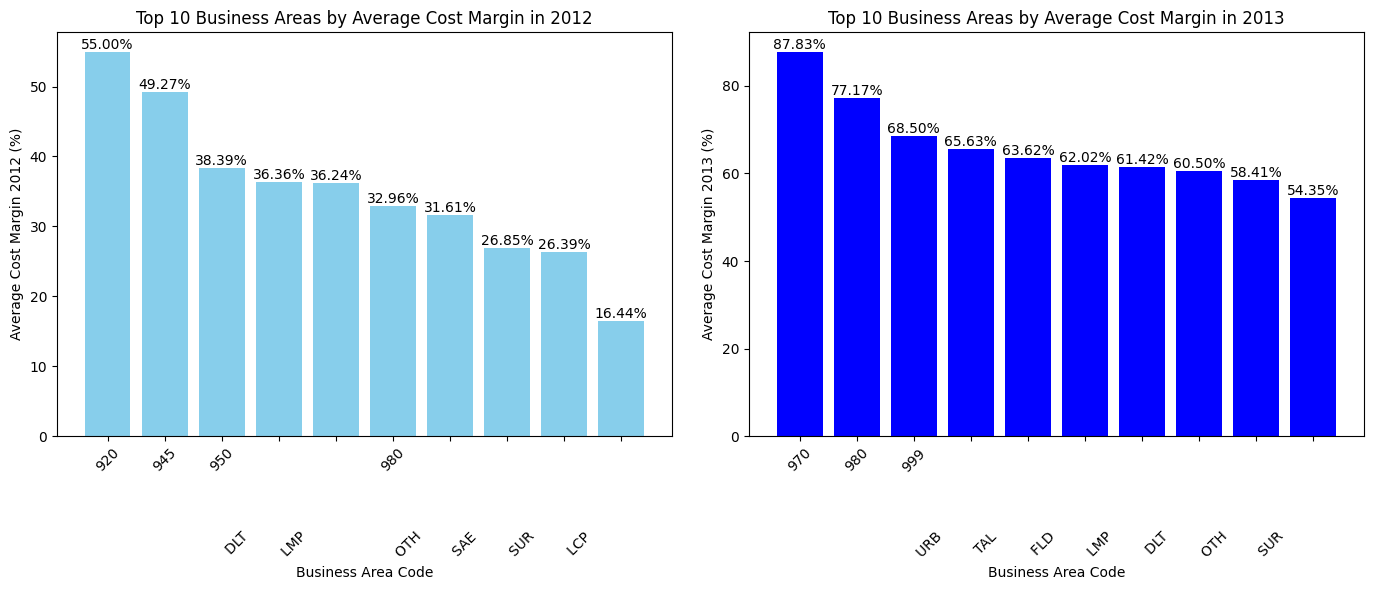

In [25]:
# Selecting the top 10 business areas by average cost margin

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot for 2012
top_10_2012 = average_costmargin_sorted_2012.head(10)

bars1 = ax1.bar(top_10_2012['business_area_code'], top_10_2012['average_cost_margin_2012'], color='skyblue')
ax1.set_xlabel('Business Area Code')
ax1.set_ylabel('Average Cost Margin 2012 (%)')
ax1.set_title('Top 10 Business Areas by Average Cost Margin in 2012')
ax1.set_xticks(range(len(top_10_2012['business_area_code'])))
ax1.set_xticklabels(top_10_2012['business_area_code'], rotation=45)

# Adding percentage labels for 2012
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Plot for 2013
top_10_2013 = average_costmargin_sorted_2013.head(10)

bars2 = ax2.bar(top_10_2013['business_area_code'], top_10_2013['average_cost_margin_2013'], color='blue')
ax2.set_xlabel('Business Area Code')
ax2.set_ylabel('Average Cost Margin 2013 (%)')
ax2.set_title('Top 10 Business Areas by Average Cost Margin in 2013')
ax2.set_xticks(range(len(top_10_2013['business_area_code'])))
ax2.set_xticklabels(top_10_2013['business_area_code'], rotation=45)

# Adding percentage labels for 2013
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

The average cost margin is calculated for each business area, representing the profitability as a percentage. A positive cost margin suggests profitability, while a negative cost margin indicates a loss or below-cost sales. The business area labeled "COM" on the left has a negative cost margin of approximately -62.29%, showing that it operated at a loss or below-cost for 2012.


Consistently High-Performing Areas for business areas like 950, EXL, and TRO appear in the top 10 for both years, indicating consistent performance.

In 2013, "COM" improved dramatically, leading with a positive average cost margin of 40.05%, contrasting its performance in 2012. This shift suggests a major improvement in cost management or revenue generation for "COM."

Some areas with high margins in 2012, such as "RWY" and "SAE," are absent from the 2013 top 10 list, indicating that their cost margins may have declined or other areas outperformed them. This absence might signal operational challenges or increased competition in these areas for 2013.

New areas like FLD (19.68%) and DIF (1.91%) appear in the 2013 top list, suggesting a shift in focus or improved management strategies that allowed these areas to rank among the top performers.

The margin range in 2012 is broader, with some very high and very low values (e.g., -62.29% to 43.01%).

In 2013, margins are more evenly distributed, with the lowest top-10 margin at 1.91% (DIF) and the highest at 40.05% (COM), suggesting a more balanced performance across business areas in 2013.

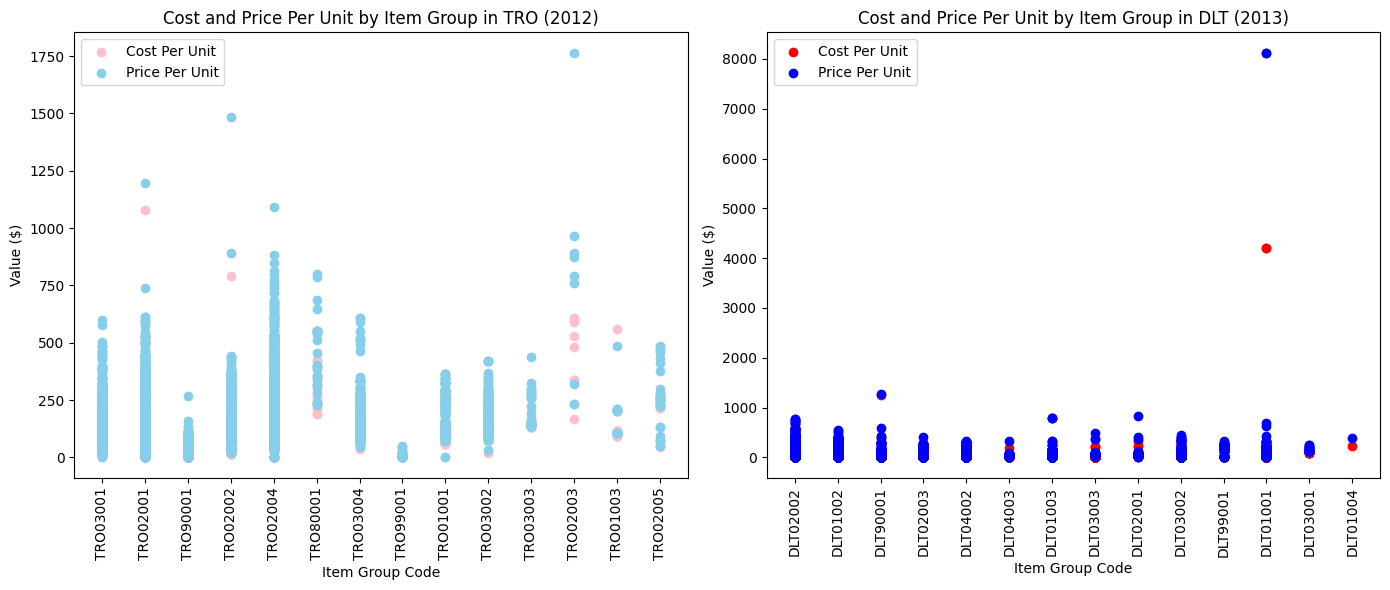

In [ ]:
# Filter the data for TRO in 2012 and DLT in 2013 consider as the lowest Average Cost Margin

year2012_positive[['item_code', 'item_group_code','business_chain_l1_code', 'business_area_code', 'salesperson_code', 'company_code', 'value_sales', 'value_cost', 'value_quantity', 'price_per_unit', 'cost_per_unit', 'cost_margin2012']].head()
year2013_positive[['item_code', 'item_group_code','business_chain_l1_code', 'business_area_code', 'salesperson_code', 'company_code', 'value_sales', 'value_cost', 'value_quantity', 'price_per_unit', 'cost_per_unit', 'cost_margin2013']].head()

tro_2012_data = year2012_positive[year2012_positive['business_area_code'] == 'TRO']
dlt_2013_data = year2013_positive[year2013_positive['business_area_code'] == 'DLT']

# Plot settings
plt.figure(figsize=(14, 6))

# Combined Plot for TRO in 2012
plt.subplot(1, 2, 1)
plt.scatter(tro_2012_data['item_group_code'], tro_2012_data['cost_per_unit'], color='pink', label='Cost Per Unit')
plt.scatter(tro_2012_data['item_group_code'], tro_2012_data['price_per_unit'], color='skyblue', label='Price Per Unit')
plt.xlabel('Item Group Code')
plt.ylabel('Value ($)')
plt.title('Cost and Price Per Unit by Item Group in TRO (2012)')
plt.xticks(rotation=90)
plt.legend()

# Combined Plot for DLT in 2013
plt.subplot(1, 2, 2)
plt.scatter(dlt_2013_data['item_group_code'], dlt_2013_data['cost_per_unit'], color='red', label='Cost Per Unit')
plt.scatter(dlt_2013_data['item_group_code'], dlt_2013_data['price_per_unit'], color='blue', label='Price Per Unit')
plt.xlabel('Item Group Code')
plt.ylabel('Value ($)')
plt.title('Cost and Price Per Unit by Item Group in DLT (2013)')
plt.xticks(rotation=90)
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

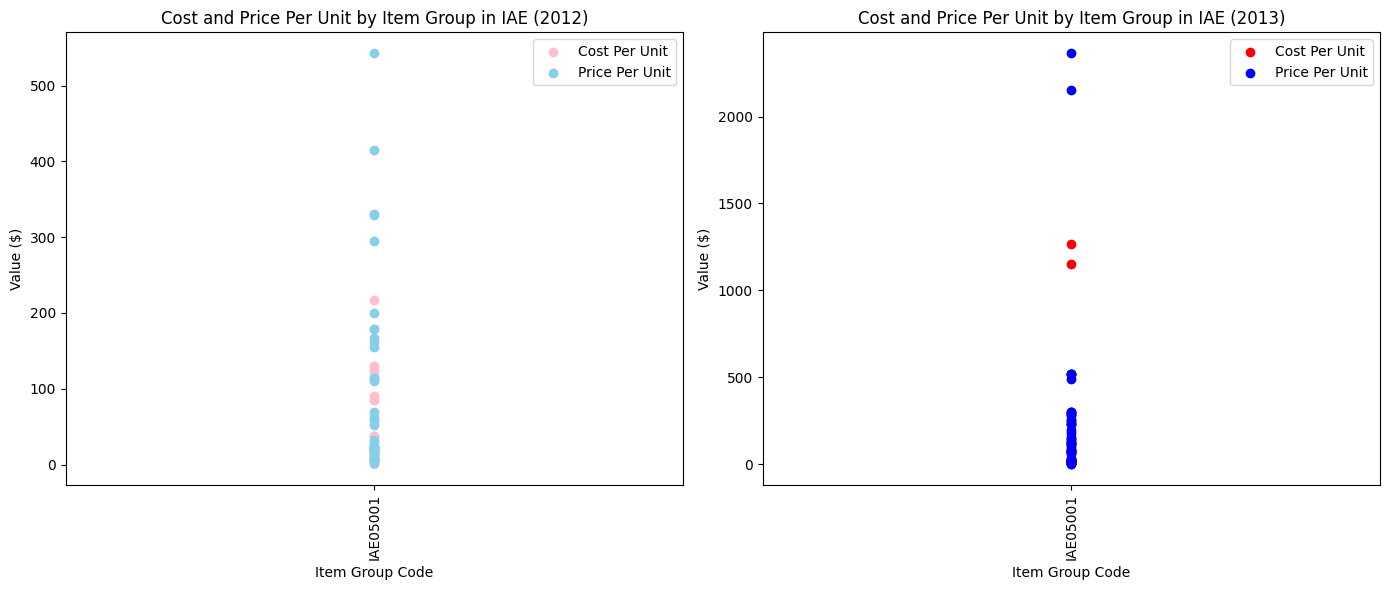

In [ ]:
# Filter the data for IAE in 2012 and IAE in 2013 consider as the highest Average Cost Margin

year2012_positive[['item_code', 'item_group_code','business_chain_l1_code', 'business_area_code', 'salesperson_code', 'company_code', 'value_sales', 'value_cost', 'value_quantity', 'price_per_unit', 'cost_per_unit', 'cost_margin2012']].head()
year2013_positive[['item_code', 'item_group_code','business_chain_l1_code', 'business_area_code', 'salesperson_code', 'company_code', 'value_sales', 'value_cost', 'value_quantity', 'price_per_unit', 'cost_per_unit', 'cost_margin2013']].head()

iae_2012_data = year2012_positive[year2012_positive['business_area_code'] == 'IAE']
iae_2013_data = year2013_positive[year2013_positive['business_area_code'] == 'IAE']

# Plot settings
plt.figure(figsize=(14, 6))

# Combined Plot for IAE in 2012
plt.subplot(1, 2, 1)
plt.scatter(iae_2012_data['item_group_code'], iae_2012_data['cost_per_unit'], color='pink', label='Cost Per Unit')
plt.scatter(iae_2012_data['item_group_code'], iae_2012_data['price_per_unit'], color='skyblue', label='Price Per Unit')
plt.xlabel('Item Group Code')
plt.ylabel('Value ($)')
plt.title('Cost and Price Per Unit by Item Group in IAE (2012)')
plt.xticks(rotation=90)
plt.legend()

# Combined Plot for IAE in 2013
plt.subplot(1, 2, 2)
plt.scatter(iae_2013_data['item_group_code'], iae_2013_data['cost_per_unit'], color='red', label='Cost Per Unit')
plt.scatter(iae_2013_data['item_group_code'], iae_2013_data['price_per_unit'], color='blue', label='Price Per Unit')
plt.xlabel('Item Group Code')
plt.ylabel('Value ($)')
plt.title('Cost and Price Per Unit by Item Group in IAE (2013)')
plt.xticks(rotation=90)
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

In [ ]:
# Filter the data for TRO in 2012 and DLT in 2013

year2012_positive[['item_code', 'item_group_code','business_chain_l1_code', 'business_area_code', 'salesperson_code', 'company_code', 'value_sales', 'value_cost', 'value_quantity', 'price_per_unit', 'cost_per_unit', 'cost_margin2012']].head()
year2013_positive[['item_code', 'item_group_code','business_chain_l1_code', 'business_area_code', 'salesperson_code', 'company_code', 'value_sales', 'value_cost', 'value_quantity', 'price_per_unit', 'cost_per_unit', 'cost_margin2013']].head()

tro_2012_data = year2012_positive[year2012_positive['business_area_code'] == 'TRO']
dlt_2013_data = year2013_positive[year2013_positive['business_area_code'] == 'DLT']

# Plot settings
plt.figure(figsize=(14, 6))

# Combined Plot for TRO in 2012
plt.subplot(1, 2, 1)
plt.scatter(tro_2012_data['item_group_code'], tro_2012_data['cost_per_unit'], color='red', label='Cost Per Unit')
plt.scatter(tro_2012_data['item_group_code'], tro_2012_data['price_per_unit'], color='blue', label='Price Per Unit')
plt.xlabel('Item Group Code')
plt.ylabel('Value ($)')
plt.title('Cost and Price Per Unit by Item Group in TRO (2012)')
plt.xticks(rotation=90)
plt.legend()

# Combined Plot for DLT in 2013
plt.subplot(1, 2, 2)
plt.scatter(dlt_2013_data['item_group_code'], dlt_2013_data['cost_per_unit'], color='red', label='Cost Per Unit')
plt.scatter(dlt_2013_data['item_group_code'], dlt_2013_data['price_per_unit'], color='blue', label='Price Per Unit')
plt.xlabel('Item Group Code')
plt.ylabel('Value ($)')
plt.title('Cost and Price Per Unit by Item Group in DLT (2013)')
plt.xticks(rotation=90)
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

In [ ]:
# extra company_code
# Group by 'company_code' to calculate the average cost margin 2012
average_costmargin_item_2012 = year2012_positive.groupby(['company_code']).agg(
    average_cost_margin_2012=('cost_margin2012', 'mean')
).reset_index()

# Sort the result by 'company_code' and descending 'average_cost_margin' within each company
average_costmargin_sorted_2012 = average_costmargin_item_2012.sort_values(by='average_cost_margin_2012', ascending=False)

# Display the result
print(average_costmargin_sorted_2012.head(10))
print(average_costmargin_sorted_2012.shape[0])

# Group by 'company_code' to calculate the average cost margin 2013
average_costmargin_item_2013 = year2013_positive.groupby(['company_code']).agg(
    average_cost_margin_2013=('cost_margin2013', 'mean')
).reset_index()

# Sort the result by 'company_code' and descending 'average_cost_margin' within each company
average_costmargin_sorted_2013 = average_costmargin_item_2013.sort_values(by='average_cost_margin_2013', ascending=False)

# Display the result
print(average_costmargin_sorted_2013.head(10))
print(average_costmargin_sorted_2013.shape[0])

   company_code  average_cost_margin_2012
7           510                100.000000
6           240                 54.888405
4           205                 53.784514
5           220                 51.003657
2           140                 36.079689
8           950                 33.394033
3           170                 31.896965
0           100                  3.913494
1           101                 -5.342640
9
   company_code  average_cost_margin_2013
0           100                100.000000
3           205                 50.106754
2           120                 44.161274
4           240                 43.362538
5           950                 40.514733
1           101                 21.680400
6


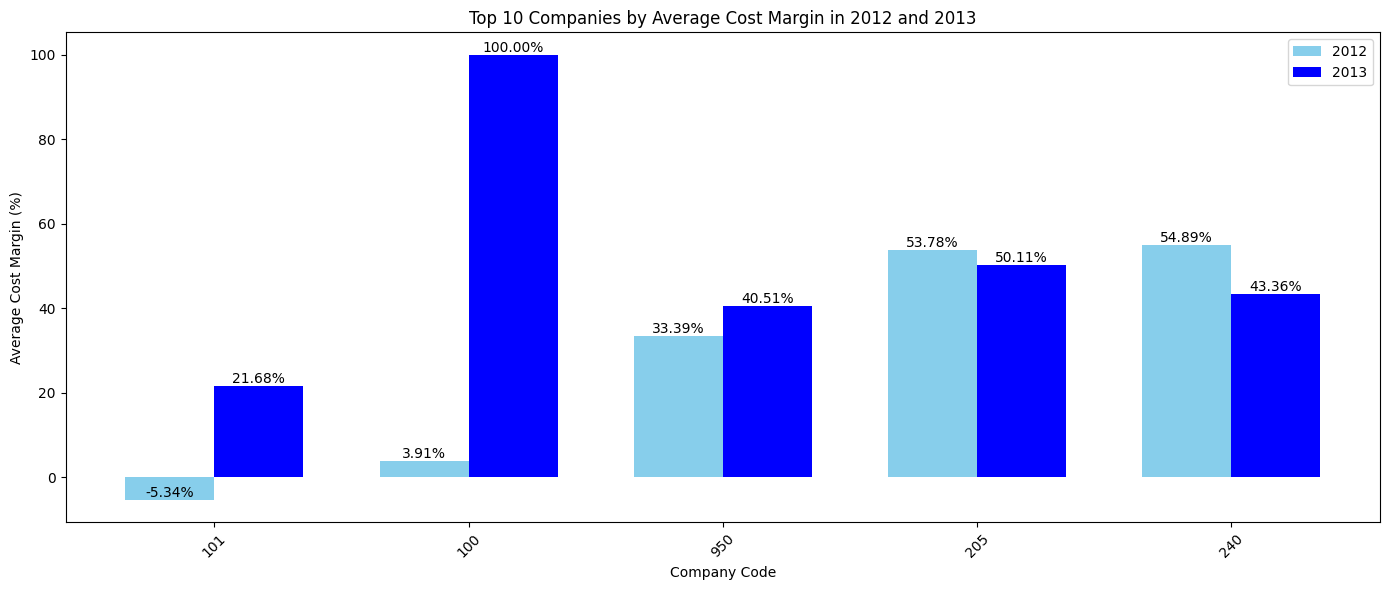

In [ ]:
# Group by 'company_code' and calculate the average cost margin for 2012
average_costmargin_item_2012 = year2012_positive.groupby(['company_code']).agg(
    average_cost_margin_2012=('cost_margin2012', 'mean')
).reset_index()

# Sort by average cost margin in descending order and select top 10
average_costmargin_sorted_2012 = average_costmargin_item_2012.sort_values(by='average_cost_margin_2012', ascending=True)
top_10_companies_2012 = average_costmargin_sorted_2012.head(10)

# Group by 'company_code' and calculate the average cost margin for 2013
average_costmargin_item_2013 = year2013_positive.groupby(['company_code']).agg(
    average_cost_margin_2013=('cost_margin2013', 'mean')
).reset_index()

# Sort by average cost margin in descending order and select top 10
average_costmargin_sorted_2013 = average_costmargin_item_2013.sort_values(by='average_cost_margin_2013', ascending=True)
top_10_companies_2013 = average_costmargin_sorted_2013.head(10)

# Merge the top 10 companies from 2012 and 2013 for side-by-side comparison
merged_top_10 = top_10_companies_2012.merge(top_10_companies_2013, on='company_code', suffixes=('_2012', '_2013'))

# Set the positions for side-by-side bars
bar_width = 0.35
indices = np.arange(len(merged_top_10))

# Plotting the comparison of top 10 companies by average cost margin for 2012 and 2013
plt.figure(figsize=(14, 6))
bars_2012 = plt.bar(indices - bar_width/2, merged_top_10['average_cost_margin_2012'], width=bar_width, color='skyblue', label='2012')
bars_2013 = plt.bar(indices + bar_width/2, merged_top_10['average_cost_margin_2013'], width=bar_width, color='blue', label='2013')

# Adding labels and title
plt.xlabel('Company Code')
plt.ylabel('Average Cost Margin (%)')
plt.title('Top 10 Companies by Average Cost Margin in 2012 and 2013')
plt.xticks(indices, merged_top_10['company_code'], rotation=45)
plt.legend()

# Adding percentage labels on top of each bar
for bar in bars_2012 + bars_2013:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# **B. DESCRIPTIVE ANALYSIS**

## **1. Major Sellers**
*Note: This section use both positive and negative sales value to account for refunded orders.*

In [ ]:
# Function to group smaller categories into 'Other'
def group_small_categories(series, threshold=2.0):
    large_categories = series[series >= threshold]
    small_categories_sum = series[series < threshold].sum()
    large_categories['Other'] = small_categories_sum
    return large_categories

In [ ]:
# Sum 'value_sales_aud' by company_code for 2012 and 2013
company_sales_2012 = year2012.groupby('company_code')['value_sales_aud'].sum()
company_sales_2013 = year2013.groupby('company_code')['value_sales_aud'].sum()

# Calculate the total sales to determine grouping threshold (2% of total sales)
threshold_2012 = 0.02 * company_sales_2012.sum()
threshold_2013 = 0.02 * company_sales_2013.sum()

# Group small categories for bar charts based on sum values
company_sales_2012_grouped = group_small_categories(company_sales_2012, threshold=threshold_2012)
company_sales_2013_grouped = group_small_categories(company_sales_2013, threshold=threshold_2013)

# Sort the grouped sums in descending order for better visualization
company_sales_2012_sorted = company_sales_2012_grouped.sort_values(ascending=False)
company_sales_2013_sorted = company_sales_2013_grouped.sort_values(ascending=False)

# Group smaller categories for the pie charts using percentage threshold (2%)
company_code_2012 = year2012['company_code'].value_counts(normalize=True) * 100
company_code_2013 = year2013['company_code'].value_counts(normalize=True) * 100
company_code_2012_grouped = group_small_categories(company_code_2012, threshold=2.0)
company_code_2013_grouped = group_small_categories(company_code_2013, threshold=2.0)

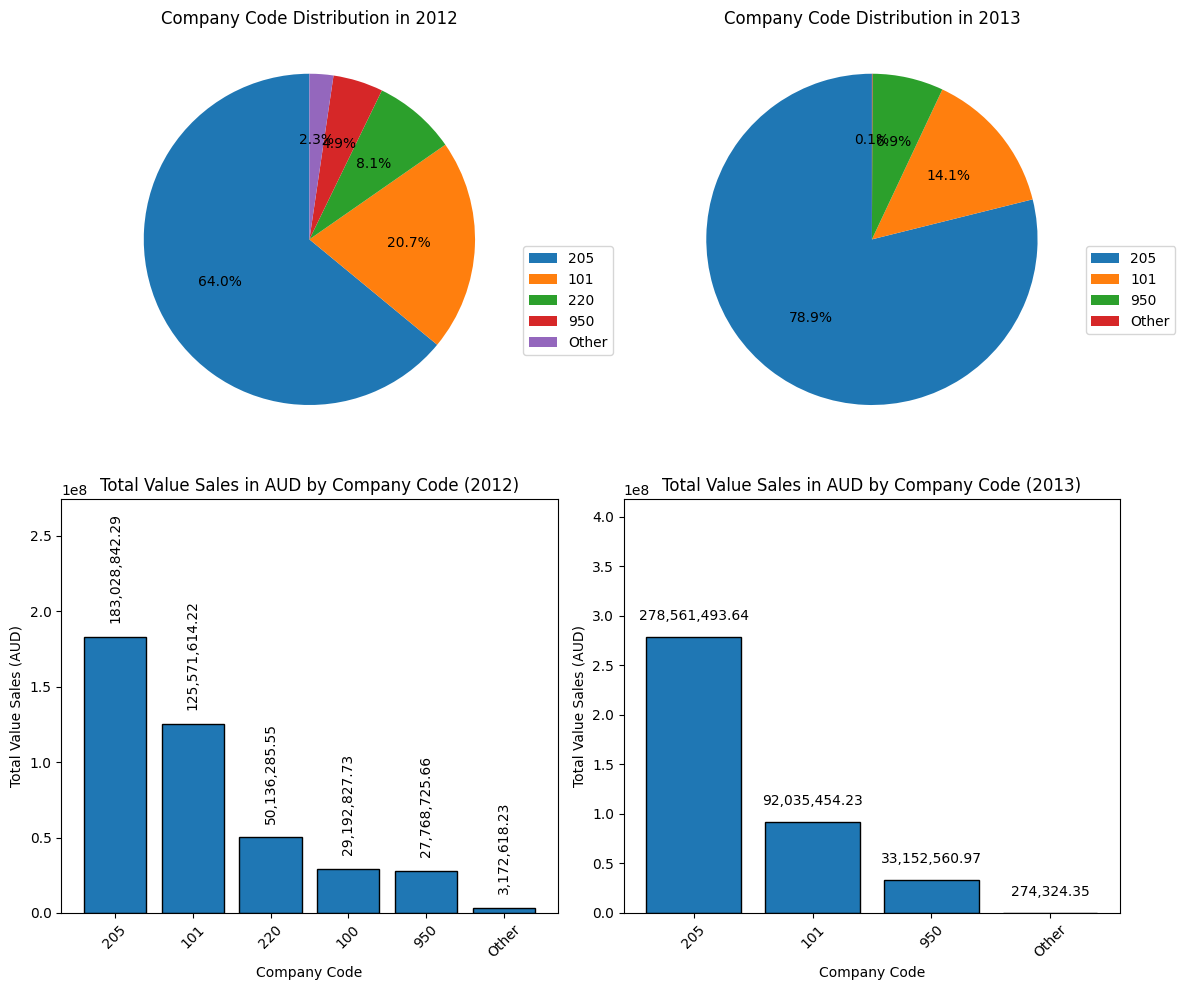

In [ ]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Pie chart for 2012
axes[0, 0].pie(
    company_code_2012_grouped,
    startangle=90,
    autopct='%1.1f%%'
)
axes[0, 0].set_title('Company Code Distribution in 2012')
axes[0, 0].legend(company_code_2012_grouped.index, loc="best", bbox_to_anchor=(1, 0.5))

# Pie chart for 2013
axes[0, 1].pie(
    company_code_2013_grouped,
    startangle=90,
    autopct='%1.1f%%'
)
axes[0, 1].set_title('Company Code Distribution in 2013')
axes[0, 1].legend(company_code_2013_grouped.index, loc="best", bbox_to_anchor=(1, 0.5))

# Bar chart for 2012 with grouped sums and labels
bars_2012 = axes[1, 0].bar(company_sales_2012_sorted.index.astype(str),
                            company_sales_2012_sorted.values,
                            edgecolor='black')
axes[1, 0].set_title('Total Value Sales in AUD by Company Code (2012)')
axes[1, 0].set_xlabel('Company Code')
axes[1, 0].set_ylabel('Total Value Sales (AUD)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_ylim(0, company_sales_2012_sorted.values.max() * 1.5)

# Add labels to the bars for 2012
padding_2012 = 0.05 * company_sales_2012_sorted.values.max()
for bar in bars_2012:
    axes[1, 0].text(
        bar.get_x() + bar.get_width() / 2, bar.get_height() + padding_2012,
        f'{bar.get_height():,.2f}', ha='center', va='bottom', fontsize=10, rotation = 90
    )

# Bar chart for 2013 with grouped sums and labels
bars_2013 = axes[1, 1].bar(company_sales_2013_sorted.index.astype(str),
                            company_sales_2013_sorted.values,
                            edgecolor='black')
axes[1, 1].set_title('Total Value Sales in AUD by Company Code (2013)')
axes[1, 1].set_xlabel('Company Code')
axes[1, 1].set_ylabel('Total Value Sales (AUD)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_ylim(0, company_sales_2013_sorted.values.max() * 1.5)

# Add labels to the bars for 2013
padding_2013 = 0.05 * company_sales_2013_sorted.values.max()
for bar in bars_2013:
    axes[1, 1].text(
        bar.get_x() + bar.get_width() / 2, bar.get_height() + padding_2013,
        f'{bar.get_height():,.2f}', ha='center', va='bottom', fontsize=10
    )

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Accross all sellers, company 101 and company 205 have the best performance with significant growth throughout the target period. Other companies are either disappear from the dataset or experience no changes. Specifically:
1. Company 205 has the highest occurence, incdicating the company processed the most amount of orders across 2012 and 2013.
2. Company 101 comes second. However, this seller record highest sales across the two years.
3. Company 220 and 100 appeared in 2012 but show no signs in 2013, possibly indicating withrawal from the industry.
4. Company such as 950 experienced no changes, which might be due to their operations in niche areas or those with constant demands.

> Overall, both 205 and 101 have good indicators, while the former has higher counts with less valuable products, the latter has lower counts but with much higher order values.

Based on this finding, for the simplicity of this study, the upcoming research will be narrowed down upon Company 101 and Company 205 to identify factors that lead to the growth of these businesses. Other companies who disappeared or remained stable might be target for

## **2. Mapping the Company with its relative Order Type**

In [ ]:
# Filter the data for company_code 205 and 101
filtered_data_2012 = year2012[year2012['company_code'].isin([205, 101])]
filtered_data_2013 = year2013[year2013['company_code'].isin([205, 101])]

# Group by company_code, order_type_code, and aggregate order count and total income
order_summary_2012 = filtered_data_2012.groupby(['company_code', 'order_type_code']).agg(
    order_count=('order_type_code', 'size'),  # Count of orders
    total_income=('value_sales_aud', 'sum')       # Sum of value_sales (total income)
).reset_index()

order_summary_2013 = filtered_data_2013.groupby(['company_code', 'order_type_code']).agg(
    order_count=('order_type_code', 'size'),
    total_income=('value_sales_aud', 'sum')
).reset_index()

In [ ]:
# Create pivot table
pivot_2012 = order_summary_2012.pivot(
    index='order_type_code',
    columns='company_code',
    values=['order_count', 'total_income']
).fillna(0)

pivot_2013 = order_summary_2013.pivot(
    index='order_type_code',
    columns='company_code',
    values=['order_count', 'total_income']
).fillna(0)

# Merge the pivot
pivot_2012['Year'] = '2012'
pivot_2013['Year'] = '2013'

# Concatenate the two pivot tables along the row axis
merged_pivot = pd.concat([pivot_2012, pivot_2013], keys=['2012', '2013'], names=['Year'])

# Drop the extra 'Year' column
merged_pivot = merged_pivot.drop(columns='Year', errors='ignore')

# Reformatting
for col in merged_pivot.columns.get_level_values(0).unique():
    if col == 'total_income':
        merged_pivot[col] = merged_pivot[col].map(lambda x: f"{x:,.2f}")

In [ ]:
print("Merged Pivot Table for 2012 and 2013:")
merged_pivot

Merged Pivot Table for 2012 and 2013:


order_count             total_income                
company_code                 101       205            101             205
Year order_type_code                                                     
2012 5TN                   178.0       0.0      74,820.37            0.00
     AES                     3.0       0.0         390.11            0.00
     CDG                  1945.0    2096.0   1,085,854.95    1,382,190.60
     COA                    19.0       9.0      28,730.30        1,667.21
     COP                   144.0      64.0      96,336.57       31,896.03
     CPR                    79.0       6.0      54,683.59        1,052.46
     CRD                  1990.0   20663.0   1,051,074.57    3,882,096.24
     CRP                    65.0       4.0      17,808.39          359.33
     CRR                  6794.0   17488.0   3,886,655.08    5,755,701.72
     CSH                   261.0     236.0     218,145.15      122,408.01
     CSO                     0.0       1.0           0.00            7.20
     EDI                 33094.0   29325.0  18,357,534.45   18,851,353.49
     EDS                   242.0      62.0     104,947.54       18,856.09
     EXP                  1119.0    1905.0     768,554.44      493,379.04
     MIN                   328.0     199.0     183,617.44       77,414.28
     NOH                  4839.0     250.0   2,742,738.31      179,478.07
     NOR                126111.0  579011.0  71,977,626.85  146,803,252.45
     NOS                   845.0     235.0     551,111.70      163,899.22
     OBS                    34.0       3.0       9,753.27          116.21
     PMO                  2769.0     149.0   1,864,055.90       71,261.32
     PPD                    35.0      13.0      14,164.08        3,097.94
     PPO                  3944.0    2441.0   2,765,126.92    1,418,200.28
     PRD                  9353.0    1492.0   7,580,125.47      994,955.68
     PRO                 13128.0    2044.0   8,970,630.51    1,236,939.17
     PSA                   197.0      68.0     147,466.18       26,324.29
     PUP                  5700.0    3198.0   3,010,887.74    1,506,728.81
     SPL                    27.0       3.0       8,619.00        5,990.09
     WDC                     4.0       2.0         155.34          217.04
2013 5TN                   118.0       0.0      18,541.43            0.00
     CDG                   137.0    6436.0     155,437.35    4,192,066.45
     COA                    98.0      73.0      54,114.53       69,905.77
     COP                   147.0     440.0     109,523.61      206,546.34
     CPR                   194.0       9.0      96,141.06        2,160.15
     CRD                  2581.0   16400.0   1,294,104.00    4,694,124.07
     CRP                    72.0       8.0      45,207.68        1,943.67
     CRR                  1877.0   19559.0   1,176,325.80    9,003,807.02
     CSH                   140.0     607.0      51,264.90      329,587.09
     CSO                     0.0       1.0           0.00           32.20
     EDI                  2921.0   60676.0   1,868,574.63   35,518,688.86
     EDS                     1.0     137.0         946.26      103,038.18
     EXP                  1070.0    1603.0     599,036.90      513,778.56
     MIN                    16.0     188.0      12,561.21      257,254.61
     NOH                  6866.0     689.0   4,362,176.25      389,008.05
     NOR                 90187.0  620842.0  63,278,229.41  212,287,289.12
     NOS                   519.0     932.0     209,849.38      346,074.34
     OBS                     0.0       2.0           0.00          324.40
     PME                   235.0       7.0     113,521.79        1,975.44
     PMO                  5740.0     227.0   4,477,929.26       91,765.77
     PPD                     2.0       3.0       2,124.48        6,104.00
     PPO                  1825.0    5003.0   1,152,345.39    2,442,244.49
     PRD                  7566.0    2427.0   5,070,600.22    1,882,653.61
     PRO                 

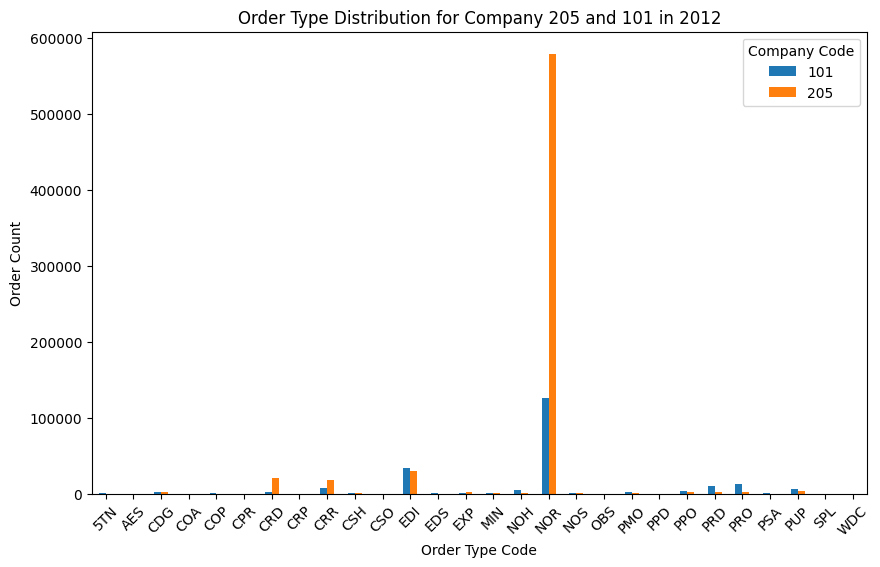

In [ ]:
# Pivot the data to prepare for visualization
pivot_2012 = order_type_summary_2012.pivot(index='order_type_code', columns='company_code', values='order_count').fillna(0)

# Plot the order type distribution of 2012
pivot_2012.plot(kind='bar', figsize=(10, 6))
plt.title("Order Type Distribution for Company 205 and 101 in 2012")
plt.xlabel("Order Type Code")
plt.ylabel("Order Count")
plt.legend(title='Company Code')
plt.xticks(rotation=45)
plt.show()

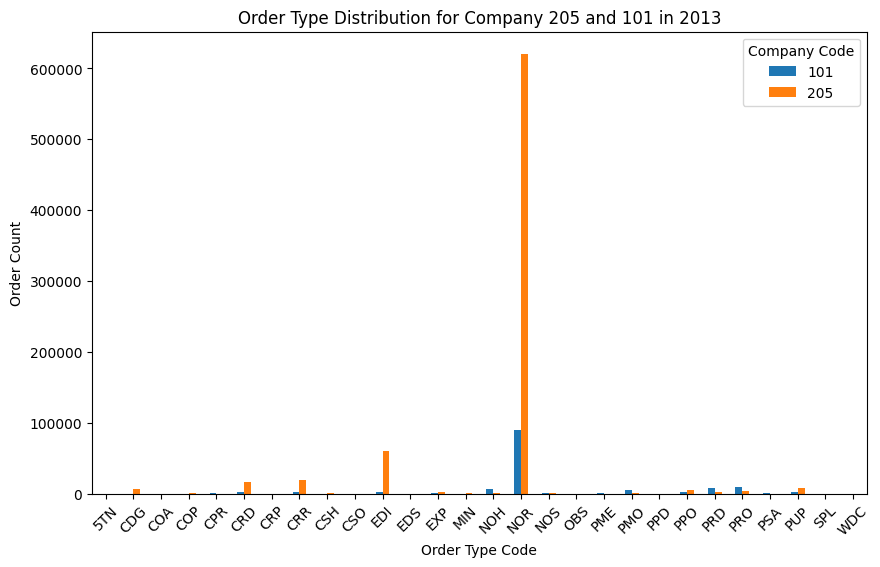

In [ ]:
# Pivot the data to prepare for visualization
pivot_2013 = order_type_summary_2013.pivot(index='order_type_code', columns='company_code', values='order_count').fillna(0)

# Plot the order type distribution of 2013
pivot_2013.plot(kind='bar', figsize=(10, 6))
plt.title("Order Type Distribution for Company 205 and 101 in 2013")
plt.xlabel("Order Type Code")
plt.ylabel("Order Count")
plt.legend(title='Company Code')
plt.xticks(rotation=45)
plt.show()

**COMPANY 205**

It is clear that the company is specialised in the **retail segment**, including managing normal orders (NOH, NOR) and dealing with trading partner (EDI - presumably Electronic Data Interchange, which is commonly used in supply chains to automate business transactions between companies).

205 also deals with two other segments, including Export (EXP) and Projects (PMO, PRD, and PRO). However these segments is much more limited than the retail one.

**COMPANY 101**

This company does not participate in the retail segment as frequent as Company 205, despite the retails being the dominant in total order count. On the other hand, the company appears to be more specialised in managing **project orders**, with the order count being 3-4 times more frequent than that of Company 205.

Nonetheless, it is noticeable that the order count in the retail segment experience significant fall over the span of 2012 to 2013, from over to below 100,000 counts. This finding is particularly consistent with our previous finding.

**INTERPRETING THE PIVOTAL TABLE**

As expected, the pivot table shows that the retail segment is the main source of income for both companies. Company 101 also earns a lot from taking project orders, upto a third of its retail revenue.

> Based on those information, the retail segment will be focus upon, with the aim of identifying reasons that influence the sales of the two company. Expectantly, we would like to also discover why Company 101 witness trough in sales. In particular, the retail segment will be determined by categorised by the following order_type_code: **NOR, NOH, NOS, and EDI**.

> *Some other adjustment order types with corresponding invoice number and item cod is also considered, including credit orders such as CDG, CRD, CRR (generally code with prefix C)*

#### Filtering the dataset based on company_code and order_type

In [ ]:
def filter_dataset(data):
    # Step 1: Filter by company codes (205 and 101)
    filtered_data = data[data['company_code'].isin([205, 101])]

    # Step 2: Identify main order types (NOR, NOH, EDI)
    main_order_types = ['NOR', 'NOH', 'EDI']
    main_orders = filtered_data[filtered_data['order_type_code'].isin(main_order_types)]

    # Step 3: Identify adjustment orders (CDG, COP, CRD, CRR)
    adjustment_order_types = ['CDG', 'COP', 'CRD', 'CRR']
    adjustments = filtered_data[filtered_data['order_type_code'].isin(adjustment_order_types)]

    # Step 4: Keep only adjustments that match the invoice number and item code from main orders
    matching_adjustments = pd.merge(
        adjustments,
        main_orders[['invoice_number', 'item_code']],  # Only keep the matching keys
        on=['invoice_number', 'item_code'],
        how='inner'
    )

    # Step 5: Combine the main orders and matching adjustments
    final_data = pd.concat([main_orders, matching_adjustments]).drop_duplicates()

    return final_data

In [ ]:
retail_2012 = filter_dataset(year2012)

In [ ]:
retail_2013 = filter_dataset(year2013)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 772752 entries, 0 to 121
Data columns (total 40 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accounting_date           772752 non-null  datetime64[ns]
 1   fiscal_year               772752 non-null  int64         
 2   fiscal_month              772752 non-null  int64         
 3   calendar_year             772752 non-null  int64         
 4   calendar_month            772752 non-null  int64         
 5   calendar_day              772752 non-null  int64         
 6   company_code              772752 non-null  int64         
 7   customer_code             772752 non-null  object        
 8   customer_district_code    772752 non-null  int64         
 9   item_code                 772752 non-null  object        
 10  business_area_code        772752 non-null  object        
 11  item_group_code           772752 non-null  object        
 12  item_class

## **Frequency of Number-based Business Area Code by Company**

<ipython-input-38-0d85e10edd80>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(all_company_codes))  # Use a colormap


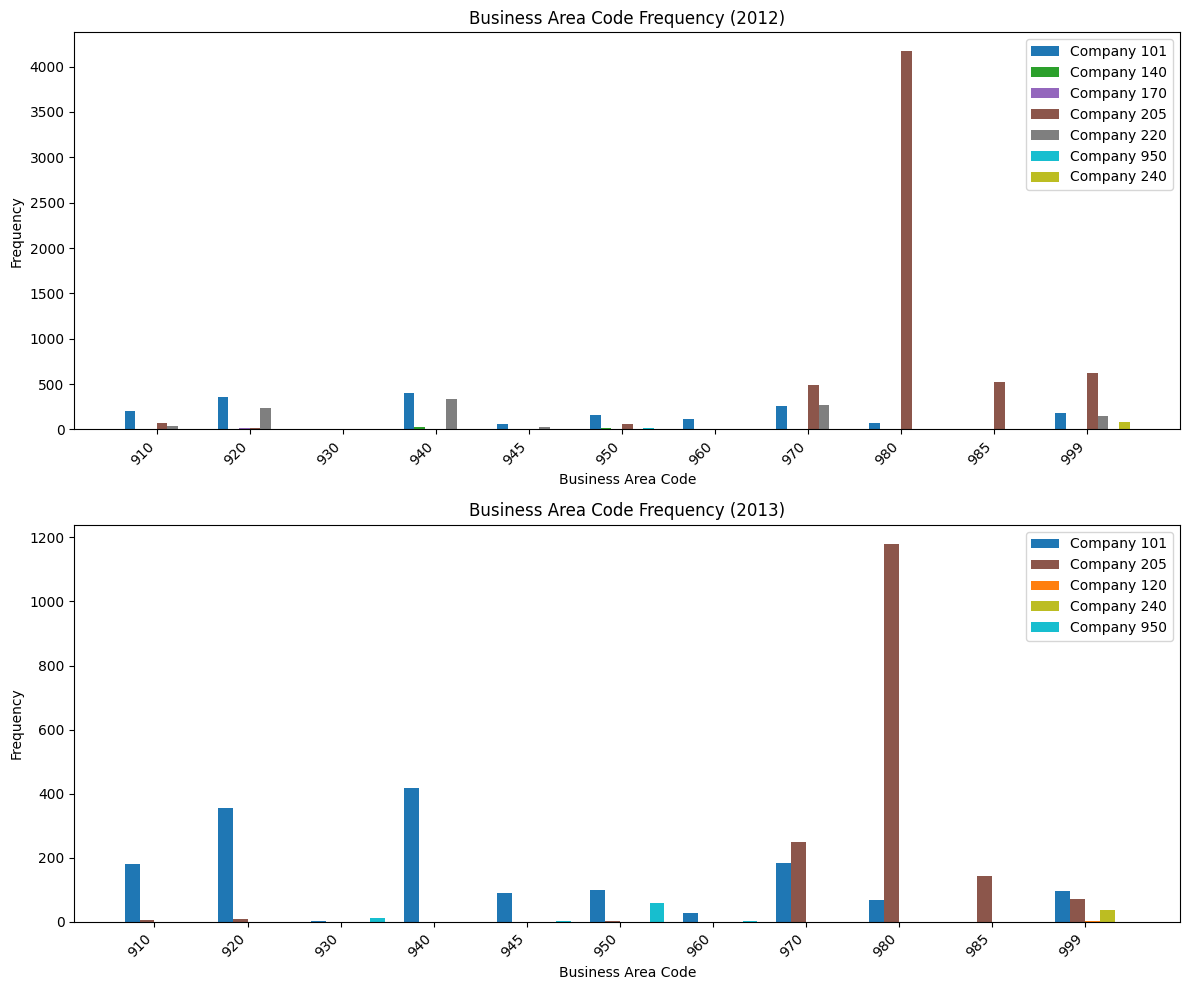

In [ ]:
# Identify numeric business_area_code entries
def is_numeric_code(code):
    try:
        float(code)  # Check if the code can be converted to a number
        return True
    except ValueError:
        return False

# Filter numeric business_area_codes for both years and convert to categorical
year2012_numeric = year2012[year2012['business_area_code'].apply(is_numeric_code)].copy()
year2013_numeric = year2013[year2013['business_area_code'].apply(is_numeric_code)].copy()

# Convert to float, then to string to treat as categorical for plotting
year2012_numeric['business_area_code'] = year2012_numeric['business_area_code'].astype(int).astype(str)
year2013_numeric['business_area_code'] = year2013_numeric['business_area_code'].astype(int).astype(str)

# Get all unique business area codes from both years
all_codes = sorted(
    set(year2012_numeric['business_area_code']).union(year2013_numeric['business_area_code'])
)

# Get unique company codes for each year
company_codes_2012 = year2012_numeric['company_code'].unique()
company_codes_2013 = year2013_numeric['company_code'].unique()

# Create a color mapping for consistent colors across years
all_company_codes = sorted(set(company_codes_2012).union(company_codes_2013))
colors = plt.cm.get_cmap('tab10', len(all_company_codes))  # Use a colormap
color_map = {code: colors(i) for i, code in enumerate(all_company_codes)}

# Create a 2-row subplot (side-by-side bars within each bin)
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Helper function to plot a histogram with side-by-side bars
def plot_histogram(ax, data, company_codes, year):
    width = 0.8 / len(company_codes)  # Width for side-by-side bars
    x = np.arange(len(all_codes))  # X-axis positions for categorical codes

    # Plot bars for each company code
    for i, company_code in enumerate(company_codes):
        subset = data[data['company_code'] == company_code]
        counts = subset['business_area_code'].value_counts().reindex(all_codes, fill_value=0)

        # Offset bars for side-by-side comparison
        ax.bar(
            x + i * width, counts.values, width=width,
            color=color_map[company_code], label=f'Company {int(company_code)}', align='edge'
        )

    ax.set_title(f'Business Area Code Frequency ({year})')
    ax.set_xlabel('Business Area Code')
    ax.set_ylabel('Frequency')
    ax.set_xticks(x + width * (len(company_codes) - 1) / 2)  # Center ticks
    ax.set_xticklabels(all_codes, rotation=45, ha='right')  # Rotate labels for clarity
    ax.legend()

# Plot histograms for 2012 and 2013 with their respective company codes
plot_histogram(axes[0], year2012_numeric, company_codes_2012, 2012)
plot_histogram(axes[1], year2013_numeric, company_codes_2013, 2013)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Number-based business_area_code is majorly associated with certain companies, such as 101, 205, and 220.

It is noticeable that most business area of such appears more frequent among company 101 and 220. The disappearance of company 220, as well as the significant rise in company 101, might indicate that the two company might have been merged

>**This is not confirmed for sure yet, we might need to study more about it. Though it is expected that we might not get much insights from this, might consider skip this one.**

## **Processing Time between Company 205 and Company 101**

#### Calculate Processing Time

In [ ]:
### YEAR 2012
# Calculate the difference between accounting_date and order_date
year2012['process_time'] = (year2012['accounting_date'] - year2012['order_date']).dt.days

# Display the dataframe with the new column
print(year2012[['order_date', 'accounting_date', 'process_time']])

        order_date accounting_date  process_time
0       2012-05-09      2012-05-09             0
1       2012-02-16      2012-02-16             0
2       2012-05-08      2012-05-09             1
3       2012-05-18      2012-05-18             0
4       2012-01-09      2012-01-09             0
...            ...             ...           ...
1037200 2012-10-19      2012-10-19             0
1037201 2012-10-25      2012-10-25             0
1037202 2012-10-25      2012-10-25             0
1037203 2012-08-30      2012-08-30             0
1037204 2012-10-25      2012-10-25             0

[1032372 rows x 3 columns]


In [ ]:
### YEAR 2013
# Calculate the difference between accounting_date and order_date
year2013['process_time'] = (year2013['accounting_date'] - year2013['order_date']).dt.days

# Display the dataframe with the new column
print(year2013[['order_date', 'accounting_date', 'process_time']])

       order_date accounting_date  process_time
0      2013-01-25      2013-01-25             0
1      2013-05-10      2013-05-13             3
2      2013-06-11      2013-06-11             0
3      2013-01-11      2013-01-11             0
4      2013-03-20      2013-03-21             1
...           ...             ...           ...
951172 2013-11-06      2013-11-06             0
951173 2013-06-27      2013-07-17            20
951174 2013-10-21      2013-10-21             0
951175 2013-10-28      2013-11-01             4
951176 2013-09-25      2013-09-25             0

[947794 rows x 3 columns]


#### Plotting

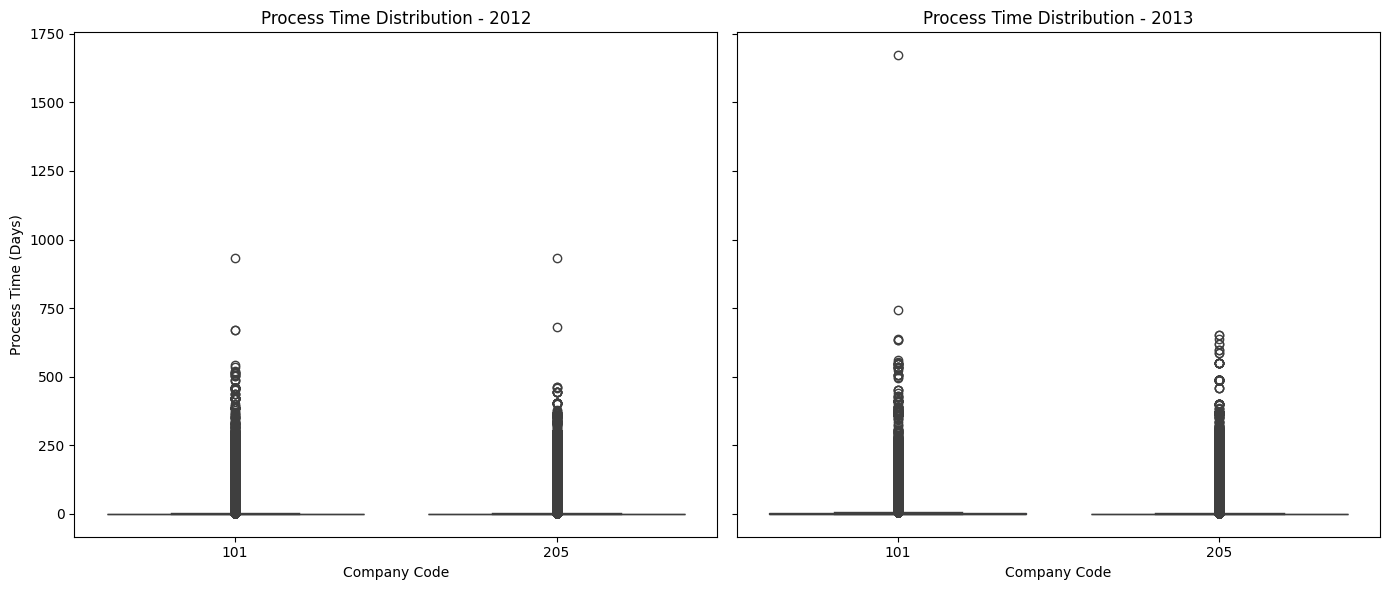

In [ ]:
# Filter data
process_time_2012 = year2012[year2012['company_code'].isin([205, 101])]
process_time_2013 = year2013[year2013['company_code'].isin([205, 101])]

# Create the subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Boxplot for year 2012
sns.boxplot(x='company_code', y='process_time', data=process_time_2012, ax=axes[0])
axes[0].set_title('Process Time Distribution - 2012')
axes[0].set_xlabel('Company Code')
axes[0].set_ylabel('Process Time (Days)')

# Boxplot for year 2013
sns.boxplot(x='company_code', y='process_time', data=process_time_2013, ax=axes[1])
axes[1].set_title('Process Time Distribution - 2013')
axes[1].set_xlabel('Company Code')

# Display the plots
plt.tight_layout()
plt.show()

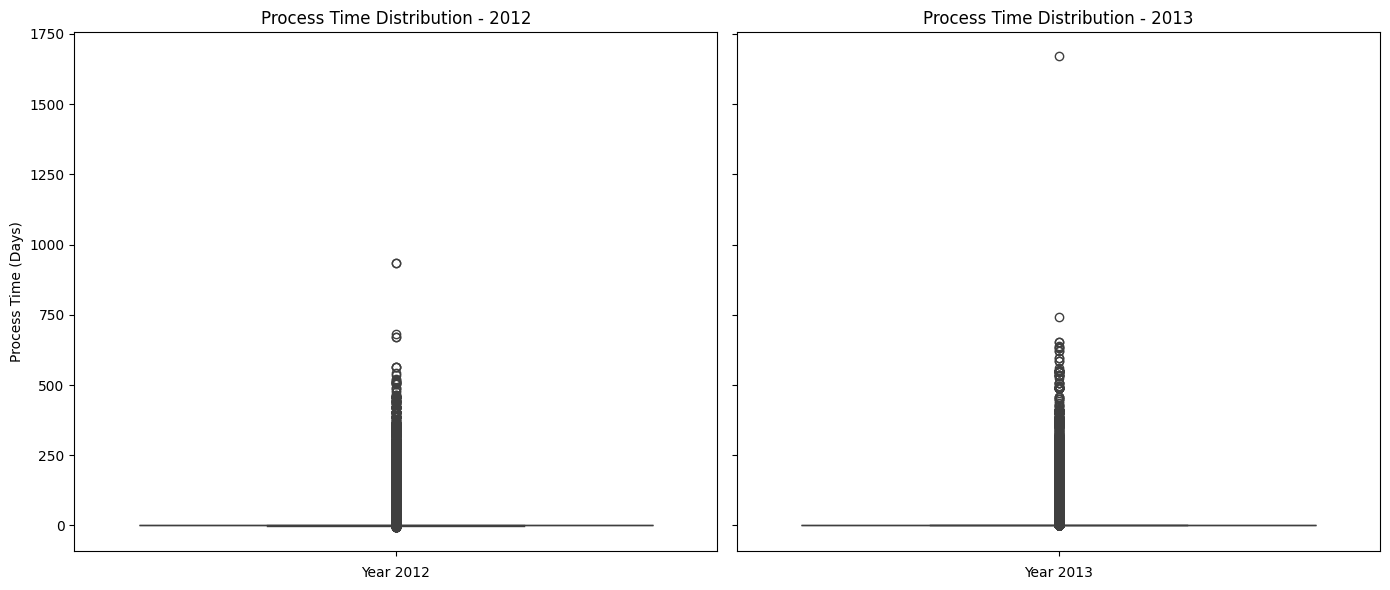

In [ ]:
# Create the subplots (without separating by company code)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Boxplot for year 2012
sns.boxplot(y='process_time', data=year2012, ax=axes[0])
axes[0].set_title('Process Time Distribution - 2012')
axes[0].set_xlabel('Year 2012')
axes[0].set_ylabel('Process Time (Days)')

# Boxplot for year 2013
sns.boxplot(y='process_time', data=year2013, ax=axes[1])
axes[1].set_title('Process Time Distribution - 2013')
axes[1].set_xlabel('Year 2013')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

## **Major business_area**
*Note: This section use both positive and negative sales value to account for refunded orders.*

Might need to adjust based on

In [ ]:
def plot_company_data(company_code, year2012, year2013):
    # Filter data for the given company_code
    year2012_filtered = year2012[year2012['company_code'] == company_code]
    year2013_filtered = year2013[year2013['company_code'] == company_code]

    # Sum 'value_sales_aud' by business area code for both years
    value_sales_2012 = year2012_filtered.groupby('business_area_code')['value_sales_aud'].sum()
    value_sales_2013 = year2013_filtered.groupby('business_area_code')['value_sales_aud'].sum()

    # Calculate thresholds (2% of the total sum) for grouping small categories
    threshold_2012 = 0.02 * value_sales_2012.sum()
    threshold_2013 = 0.02 * value_sales_2013.sum()

    # Group smaller business areas into 'Other'
    value_sales_2012_grouped = group_small_categories(value_sales_2012, threshold_2012)
    value_sales_2013_grouped = group_small_categories(value_sales_2013, threshold_2013)

    # Sort the grouped sums in descending order for plotting
    value_sales_2012_sorted = value_sales_2012_grouped.sort_values(ascending=False)
    value_sales_2013_sorted = value_sales_2013_grouped.sort_values(ascending=False)

    # Create a 2x2 grid of subplots for this company
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    fig.suptitle(f'Company Code {company_code} - Business Area Analysis', fontsize=16)

    # Pie chart for 2012
    axes[0, 0].pie(
        value_sales_2012_grouped,
        labels=value_sales_2012_grouped.index,
        autopct='%1.1f%%', startangle=90
    )
    axes[0, 0].set_title('Business Area Distribution (2012)')

    # Pie chart for 2013
    axes[0, 1].pie(
        value_sales_2013_grouped,
        labels=value_sales_2013_grouped.index,
        autopct='%1.1f%%', startangle=90
    )
    axes[0, 1].set_title('Business Area Distribution (2013)')

    # Bar chart for 2012 with raw sums
    x_2012 = np.arange(len(value_sales_2012_sorted))
    bars_2012 = axes[1, 0].bar(x_2012, value_sales_2012_sorted.values, edgecolor='black')
    axes[1, 0].set_title('Total Value Sales in AUD by Business Area (2012)')
    axes[1, 0].set_xlabel('Business Area Code')
    axes[1, 0].set_ylabel('Total Value Sales (AUD)')
    axes[1, 0].set_xticks(x_2012)
    axes[1, 0].set_xticklabels(value_sales_2012_sorted.index, rotation=45)
    axes[1, 0].set_ylim(0, value_sales_2012_sorted.values.max() * 1.5)

    # Add labels to bars (2012) with rotated text
    padding_2012 = 0.05 * value_sales_2012_sorted.values.max()
    for i, bar in enumerate(bars_2012):
        axes[1, 0].text(
            bar.get_x() + bar.get_width() / 2, bar.get_height() + padding_2012,
            f'{bar.get_height():,.2f}', ha='center', va='bottom', fontsize=10, rotation=90
        )

    # Bar chart for 2013 with raw sums
    x_2013 = np.arange(len(value_sales_2013_sorted))
    bars_2013 = axes[1, 1].bar(x_2013, value_sales_2013_sorted.values, edgecolor='black')
    axes[1, 1].set_title('Total Value Sales in AUD by Business Area (2013)')
    axes[1, 1].set_xlabel('Business Area Code')
    axes[1, 1].set_ylabel('Total Value Sales (AUD)')
    axes[1, 1].set_xticks(x_2013)
    axes[1, 1].set_xticklabels(value_sales_2013_sorted.index, rotation=45)
    axes[1, 1].set_ylim(0, value_sales_2013_sorted.values.max() * 1.5)

    # Add labels to bars (2013) with rotated text
    padding_2013 = 0.05 * value_sales_2013_sorted.values.max()
    for i, bar in enumerate(bars_2013):
        axes[1, 1].text(
            bar.get_x() + bar.get_width() / 2, bar.get_height() + padding_2013,
            f'{bar.get_height():,.2f}', ha='center', va='bottom', fontsize=10, rotation=90
        )

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

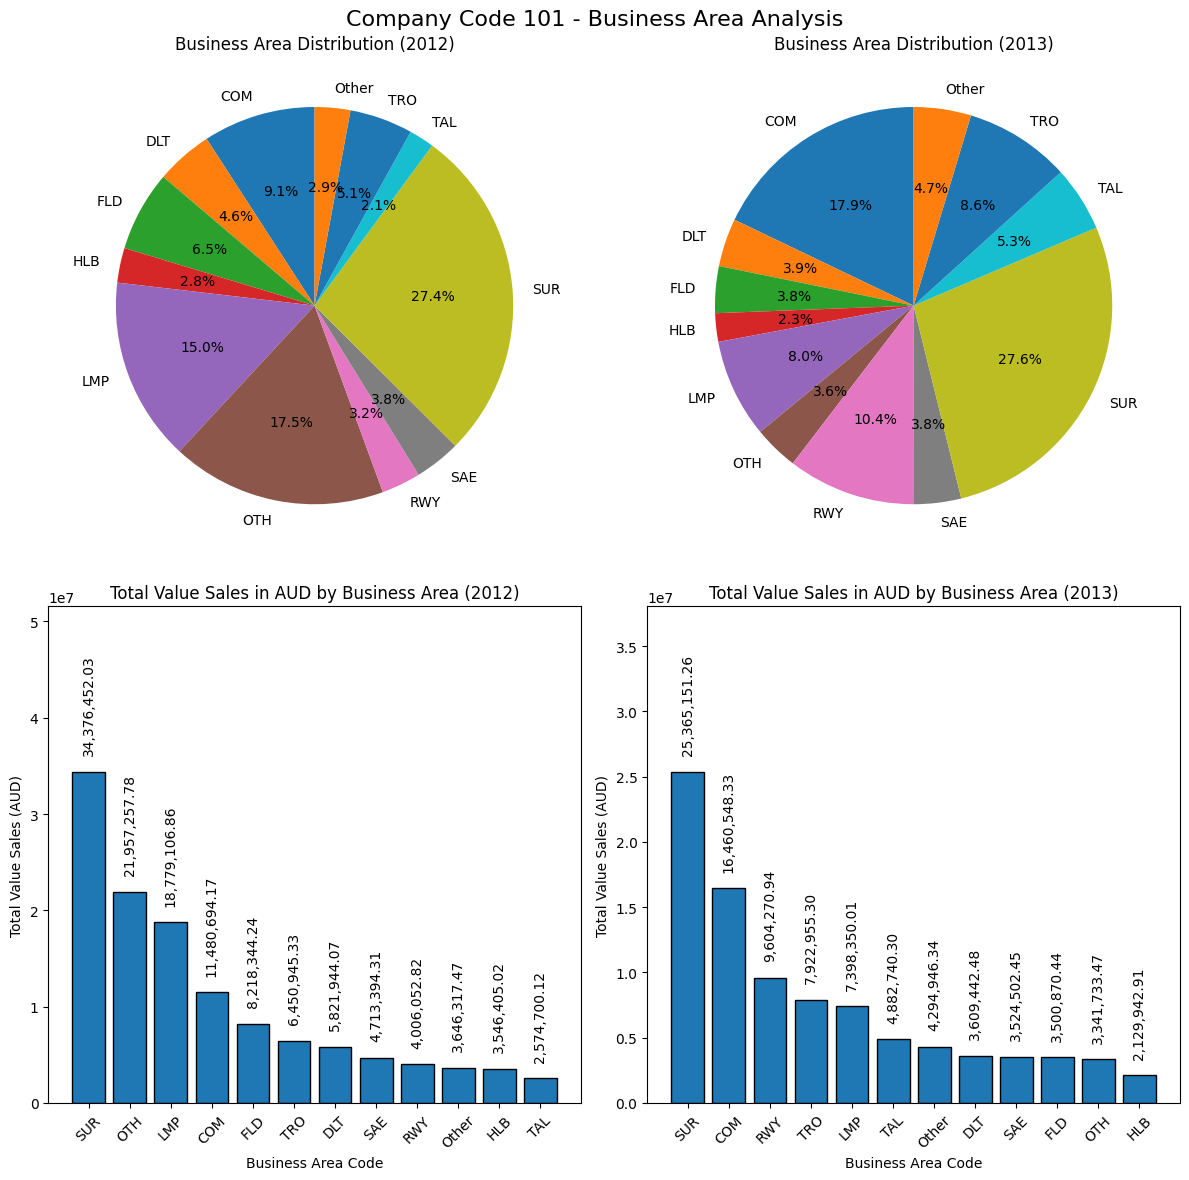

In [ ]:
# Plot for Company Code 101
plot_company_data(101, year2012, year2013)

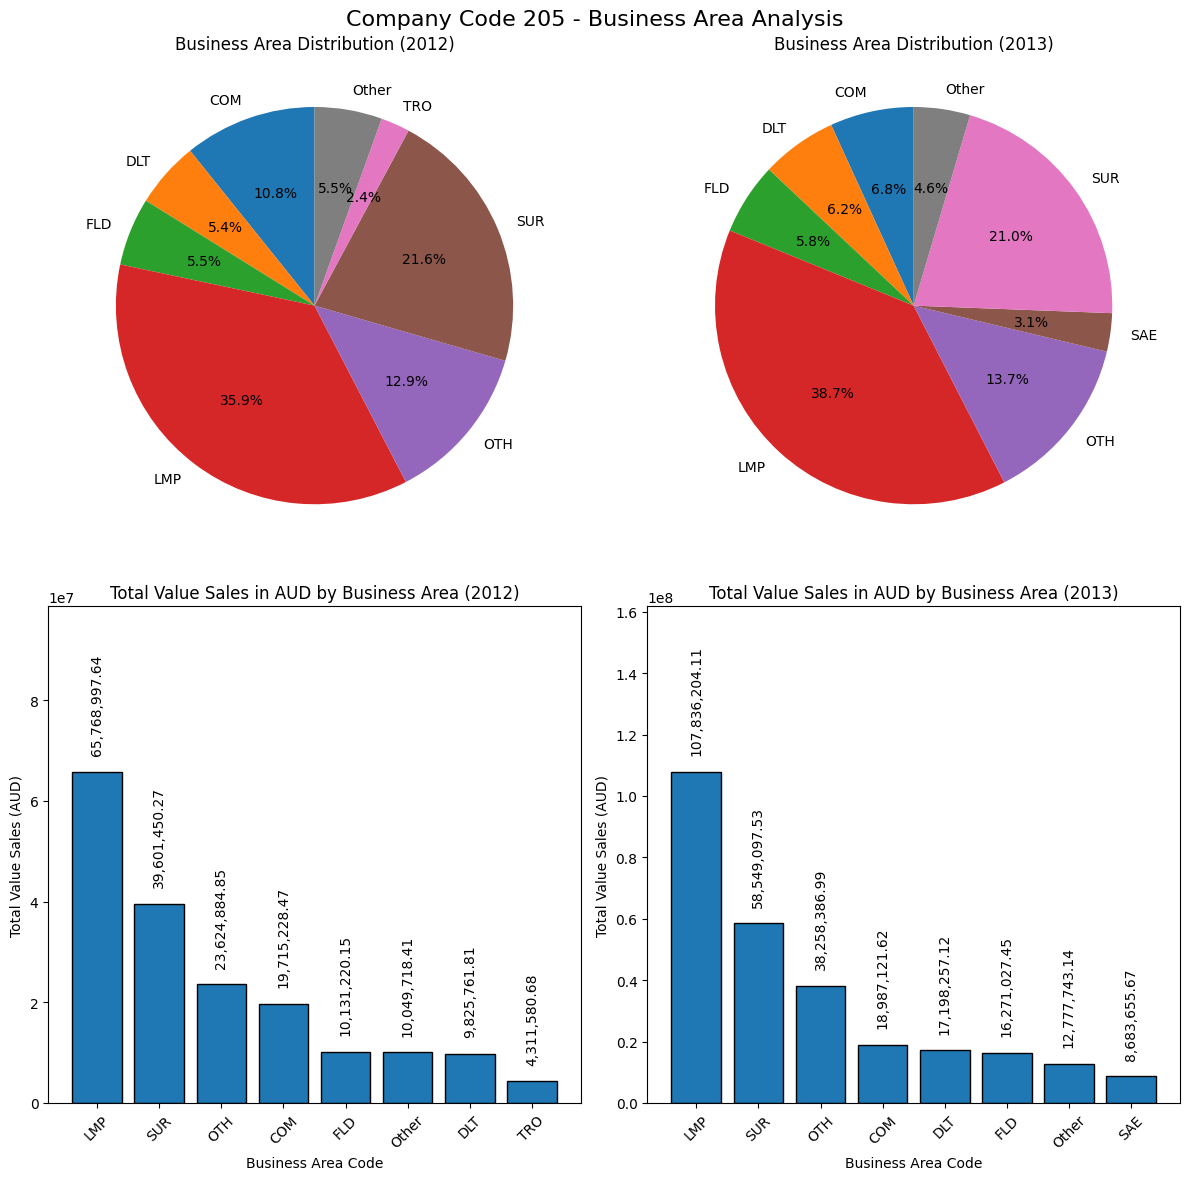

In [ ]:
# Plot for Company Code 205
plot_company_data(205, year2012, year2013)

## **Credited Orders**

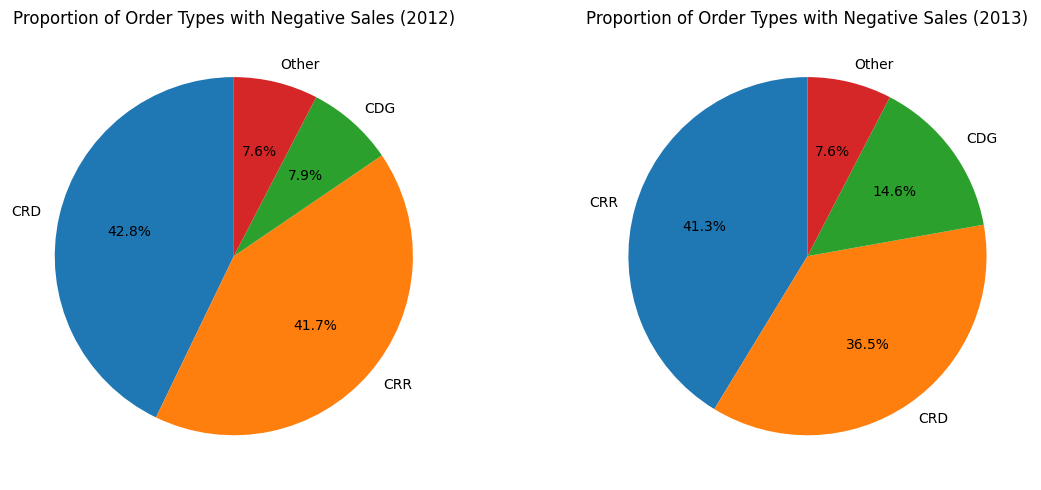

In [ ]:
# Filter data to only include observations with negative value_sales
negative_sales_2012 = year2012[year2012['value_sales'] < 0]

# Prepare data for the first subplot: Order Type
order_type_counts_2012 = negative_sales_2012['order_type_code'].value_counts()
order_type_top3_2012 = order_type_counts_2012.iloc[:3]
order_type_other_2012 = pd.Series(order_type_counts_2012.iloc[3:].sum(), index=['Other'])
order_type_pie_data_2012 = pd.concat([order_type_top3_2012, order_type_other_2012])

# Filter data to only include observations with negative value_sales
negative_sales_2013 = year2013[year2013['value_sales'] < 0]

# Prepare data for the first subplot: Order Type
order_type_counts_2013 = negative_sales_2013['order_type_code'].value_counts()
order_type_top3_2013 = order_type_counts_2013.iloc[:3]
order_type_other_2013 = pd.Series(order_type_counts_2013.iloc[3:].sum(), index=['Other'])
order_type_pie_data_2013 = pd.concat([order_type_top3_2013, order_type_other_2013])

# Plotting the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: Pie chart of Order Type
axes[0].pie(order_type_pie_data_2012, labels=order_type_pie_data_2012.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Proportion of Order Types with Negative Sales (2012)')

# Second subplot: Pie chart of Customer District Code
axes[1].pie(order_type_pie_data_2013, labels=order_type_pie_data_2013.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Proportion of Order Types with Negative Sales (2013)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# **C. SUBSAMPLE TESTING**

## **1. Outlier**

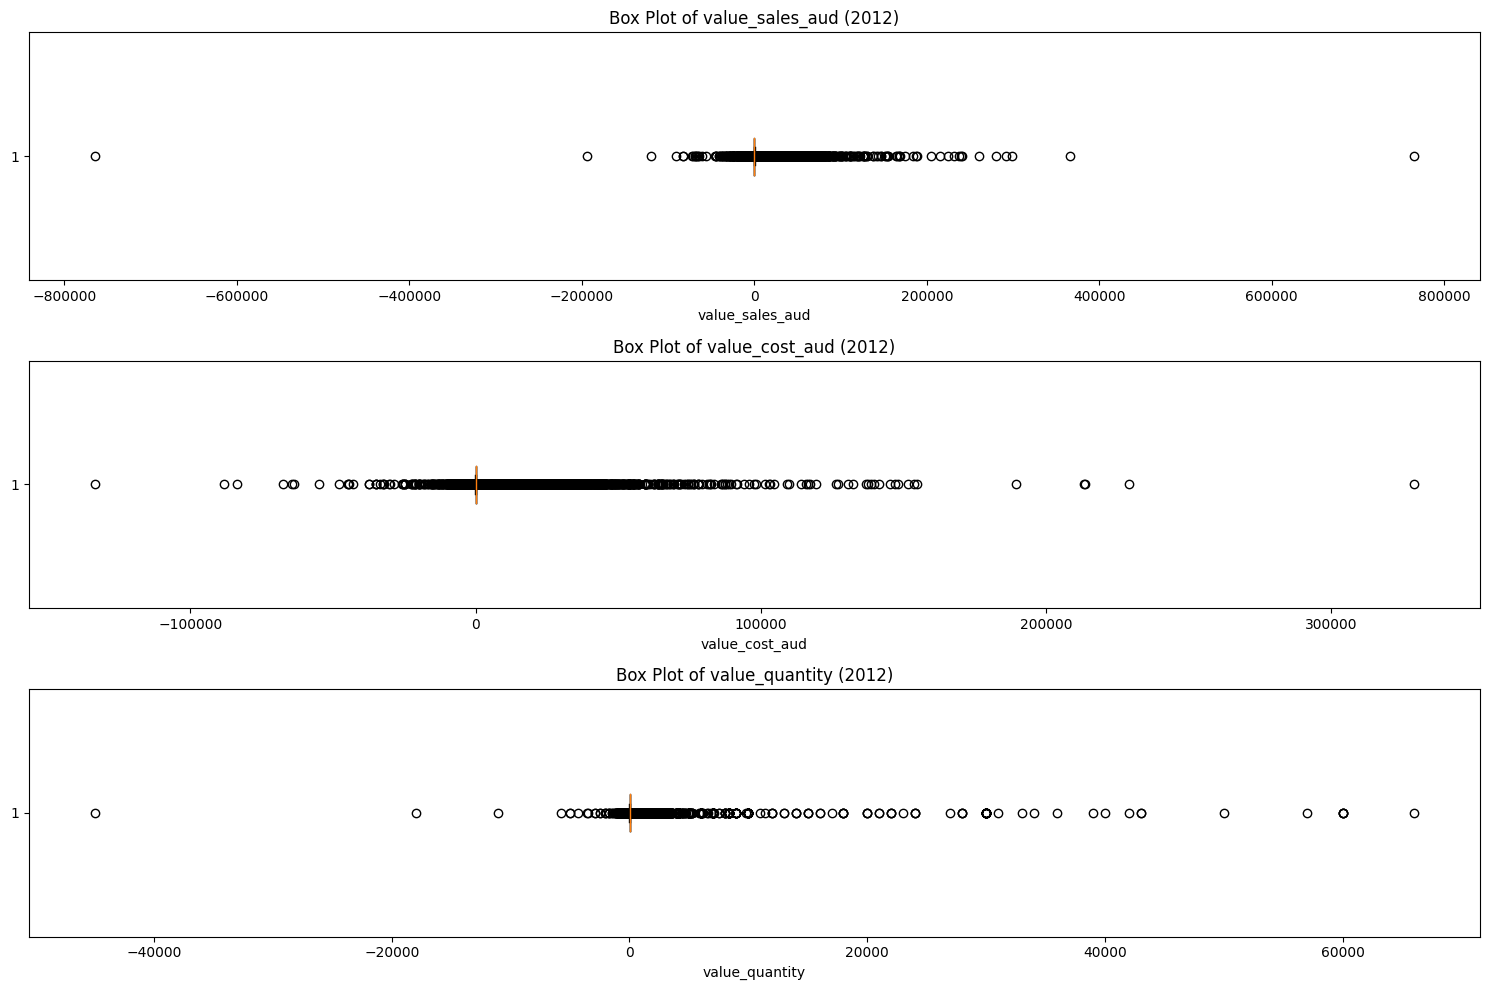

In [ ]:
# List the columns to plot (ensure these columns exist)
columns_to_plot = ['value_sales_aud', 'value_cost_aud', 'value_quantity']


# Create a 1x3 grid of subplots for the box plots
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

# Plot horizontal box plots for each variable
for ax, col in zip(axes.flatten(), columns_to_plot):
    ax.boxplot(year2012[col].dropna(), vert=False)  # vert=False for horizontal box plot
    ax.set_title(f'Box Plot of {col} (2012)')
    ax.set_xlabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

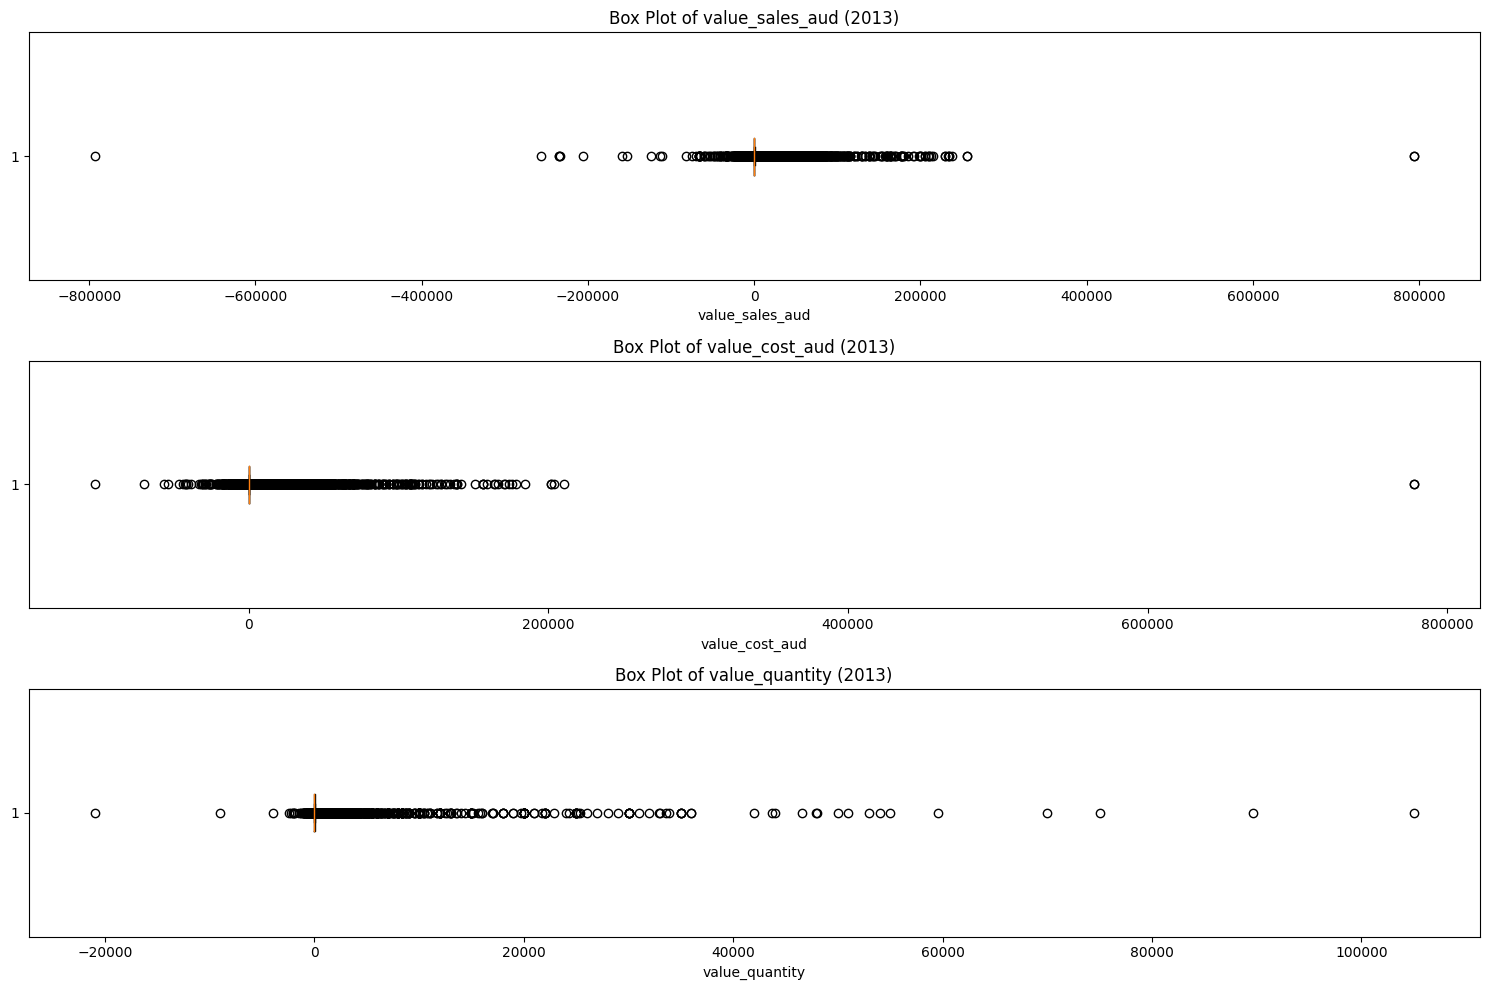

In [ ]:
# Create a 1x3 grid of subplots for the box plots
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

# Plot horizontal box plots for each variable
for ax, col in zip(axes.flatten(), columns_to_plot):
    ax.boxplot(year2013[col].dropna(), vert=False)  # vert=False for horizontal box plot
    ax.set_title(f'Box Plot of {col} (2013)')
    ax.set_xlabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## **2. Testing**

# **D. MULTIPLE REGRESSION**

## **1. Data Engineering**

#### Concat the 2012 and 2013 dataset

In [ ]:
# Merging 2012 and 2013 dataset
transaction = pd.concat([year2012, year2013], axis=0)
transaction.reset_index(drop=True, inplace=True)

In [ ]:
transaction.shape

(1980166, 40)

#### Adjust negative sales

In [ ]:
# Step 1: Identify adjustments (negative value_sales_aud or specific order types)
adjustments = transaction[
    (transaction['value_sales'] < 0) |
    (transaction['order_type_code'].isin(['CRD', 'ZCR']))
]

# Identify original orders (positive value_sales_aud or quantity > 0)
original_orders = transaction[
    (transaction['value_sales'] >= 0) & (transaction['value_quantity'] > 0)
]

# Step 2: Perform a full outer join to include all original orders and adjustments
merged_data = pd.merge(
    original_orders,
    adjustments,
    on=['invoice_number', 'item_code'],
    suffixes=('_original', '_adjustment'),
    how='outer'  # Ensure all orders and adjustments are included
)

In [ ]:
adjustments.shape

(109589, 40)

In [ ]:
original_orders.shape

(1868849, 40)

In [ ]:
# Step 3: Fill NaN values for financial columns and quantity to avoid calculation errors
merged_data['value_sales_adjustment'] = merged_data['value_sales_adjustment'].fillna(0)
merged_data['value_cost_adjustment'] = merged_data['value_cost_adjustment'].fillna(0)
merged_data['value_quantity_adjustment'] = merged_data['value_quantity_adjustment'].fillna(0)

# Step 4: Calculate net values (original + adjustment)
merged_data['net_value_sales'] = (
    merged_data['value_sales_original'].fillna(0) + merged_data['value_sales_adjustment']
)
merged_data['net_value_cost'] = (
    merged_data['value_cost_original'].fillna(0) + merged_data['value_cost_adjustment']
)
merged_data['net_value_quantity'] = (
    merged_data['value_quantity_original'].fillna(0) + merged_data['value_quantity_adjustment']
)

# Step 5: Identify only common columns with '_adjustment' suffix to drop
common_columns_to_drop = [
    col for col in merged_data.columns
    if col.endswith('_adjustment') and col not in [
        'value_sales_adjustment', 'value_cost_adjustment', 'value_quantity_adjustment'
    ]
]

# Drop only the identified common columns
cleaned_transaction = merged_data.drop(columns=common_columns_to_drop)

# Step 6: Drop the '_original' suffix from the remaining columns
cleaned_transaction.columns = [col.replace('_original', '') for col in cleaned_transaction.columns]

In [ ]:
cleaned_transaction.shape

(1977818, 46)

In [ ]:
cleaned_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977818 entries, 0 to 1977817
Data columns (total 46 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   accounting_date            datetime64[ns]
 1   fiscal_year                float64       
 2   fiscal_month               float64       
 3   calendar_year              float64       
 4   calendar_month             float64       
 5   calendar_day               float64       
 6   company_code               float64       
 7   customer_code              object        
 8   customer_district_code     float64       
 9   item_code                  object        
 10  business_area_code         object        
 11  item_group_code            object        
 12  item_class_code            object        
 13  item_type                  float64       
 14  bonus_group_code           object        
 15  environment_group_code     object        
 16  technology_group_code      object   

#### Turn the adjusting process into a function

In [ ]:
def process_transactions(transaction):
    """
    This function processes transaction data by merging adjustments with original orders
    and calculating the net values for sales, costs, and quantity.

    Args:
    transaction (pd.DataFrame): The DataFrame containing transaction data with relevant columns.

    Returns:
    pd.DataFrame: A cleaned DataFrame with net values and unnecessary columns removed.
    """

    # Step 1: Identify adjustments (negative value_sales or specific order types)
    adjustments = transaction[
        (transaction['value_sales'] < 0) |
        (transaction['order_type_code'].isin(['CRD', 'ZCR']))
    ]

    # Identify original orders (positive value_sales or quantity > 0)
    original_orders = transaction[
        (transaction['value_sales'] >= 0) & (transaction['value_quantity'] > 0)
    ]

    # Step 2: Perform a full outer join to include all original orders and adjustments
    merged_data = pd.merge(
        original_orders,
        adjustments,
        on=['invoice_number', 'item_code'],
        suffixes=('_original', '_adjustment'),
        how='outer'  # Ensure all orders and adjustments are included
    )

    # Step 3: Fill NaN values for financial columns and quantity to avoid calculation errors
    merged_data['value_sales_adjustment'] = merged_data['value_sales_adjustment'].fillna(0)
    merged_data['value_cost_adjustment'] = merged_data['value_cost_adjustment'].fillna(0)
    merged_data['value_quantity_adjustment'] = merged_data['value_quantity_adjustment'].fillna(0)

    # Step 4: Calculate net values (original + adjustment)
    merged_data['net_value_sales'] = (
        merged_data['value_sales_original'].fillna(0) + merged_data['value_sales_adjustment']
    )
    merged_data['net_value_cost'] = (
        merged_data['value_cost_original'].fillna(0) + merged_data['value_cost_adjustment']
    )
    merged_data['net_value_quantity'] = (
        merged_data['value_quantity_original'].fillna(0) + merged_data['value_quantity_adjustment']
    )

    # Step 5: Identify only common columns with '_adjustment' suffix to drop
    common_columns_to_drop = [
        col for col in merged_data.columns
        if col.endswith('_adjustment') and col not in [
            'value_sales_adjustment', 'value_cost_adjustment', 'value_quantity_adjustment'
        ]
    ]

    # Drop only the identified common columns
    cleaned_transaction = merged_data.drop(columns=common_columns_to_drop)

    # Step 6: Drop the '_original' suffix from the remaining columns
    cleaned_transaction.columns = [
        col.replace('_original', '') for col in cleaned_transaction.columns
    ]

    return cleaned_transaction

## **2. Modelling**

## **E. SALES PREDICTION**

## **F. CUSTOMER CHURN**